# Research data supporting "General embedded cluster protocol for accurate modeling of oxygen vacancies in metal-oxides"

This notebook accompanies our paper: **General embedded cluster protocol for accurate modeling of oxygen vacancies in
metal-oxides** which can be found on [arXiv](https://arxiv.org/abs/2202.04633). It can be found on GitHub at https://github.com/benshi97/Data_Embedded_Cluster_Protocol and explored interactively on [Binder](https://mybinder.org/v2/gh/benshi97/Data_Embedded_Cluster_Protocol/HEAD?labpath=analyse_data.ipynb).

### Abstract

The O vacancy (Ov) formation energy, *E*<sub>Ov</sub>, is an important property of a metal-oxide, governing its performance in applications such as fuel cells or heterogeneous catalysis. These defects are routinely studied with density functional theory (DFT). However, it is well-recognized that standard DFT formulations (e.g. the generalized gradient approximation) are insufficient for modeling the Ov, requiring higher levels of theory. The embedded cluster method offers a promising approach to compute *E*<sub>Ov</sub> accurately, giving access to all electronic structure methods. Central to this approach is the construction of quantum(-mechanically treated) clusters placed within suitable embedding environments. Unfortunately, current approaches to constructing the quantum clusters either require large system sizes, preventing application of high-level methods, or require significant manual input, preventing investigations of multiple systems simultaneously. In this work, we present a systematic and general quantum cluster design protocol that can determine small converged quantum clusters for studying the Ov in metal-oxides with accurate methods such as local coupled cluster with singles, doubles plus perturbative triples excitations \[CCSD(T)\]. We apply this protocol to study the Ov in the bulk and surface planes of rutile TiO<sub>2</sub> and rocksalt MgO, producing the first accurate and well-converged determinations of *E*<sub>Ov</sub> with this method. These reference values are used to benchmark exchange-correlation functionals in DFT and we find that all studied functionals underestimate *E*<sub>Ov</sub>, with the average error decreasing along the rungs of Jacob’s ladder. This protocol is automatable for high-throughput calculations and can be generalized to study other point defects or adsorbates.

In [1]:
from cluster_scripts import *
# This imports all the functions and libraries needed for plotting all the figures in the paper 

### Table S2 - O<sub>2</sub> binding energy of various electronic structure methods



In [5]:
# Table of O2 binding energy. We also use this cell to calculate the O_atom energies which will be required for calculating EOv later on.

# Initializing total energy of O atom for PBE at def2-SVP + def2-TZVPP basis sets and PBE0 at def2-TZVPP level
O_ene_PBE_SVP = find_energy('02-Simulation_Data/Table_S02-O2_Binding_Energy/Calculations/O/PBE_SVP/mrcc.out',typ='dft')
O_ene_PBE_TZVPP = find_energy('02-Simulation_Data/Table_S02-O2_Binding_Energy/Calculations/O/PBE_TZVPP/mrcc.out',typ='dft')
O_ene_PBE0_TZVPP = find_energy('02-Simulation_Data/Table_S02-O2_Binding_Energy/Calculations/O/PBE0_TZVPP/mrcc.out',typ='dft')
O_ene_HF_TZVPP = find_energy('02-Simulation_Data/Table_S02-O2_Binding_Energy/Calculations/O/LMP2_TZ/mrcc.out',typ='hf')
O_ene_LMP2_TZVPP = O_ene_HF_TZVPP + find_energy('02-Simulation_Data/Table_S02-O2_Binding_Energy/Calculations/O/LMP2_TZ/mrcc.out',typ='mp2')
O_ene_CCSDT_TZVPP = O_ene_HF_TZVPP + find_energy('02-Simulation_Data/Table_S02-O2_Binding_Energy/Calculations/O/CCSDT_TZ/mrcc.out',typ='ccsdt')

# Binding energies will be saved in the dictionary: O2_bind_ene
O2_bind_ene = {}

# Starting with DFT (excluding double-hybrids) - all performed at def2-QZVPP level
dft_xc_functionals = ['PBE','BP86','BLYP','TPSS','SCAN','PBE0','HSE06','B3LYP','wB97X']

for i in dft_xc_functionals:
        ene_O2 = find_energy('02-Simulation_Data/Table_S02-O2_Binding_Energy/Calculations/O2/{0}/O2/mrcc.out'.format(i),typ='dft')
        ene_O_O1 = find_energy('02-Simulation_Data/Table_S02-O2_Binding_Energy/Calculations/O2/{0}/O_O1/mrcc.out'.format(i),typ='dft')
        ene_O_O2 = find_energy('02-Simulation_Data/Table_S02-O2_Binding_Energy/Calculations/O2/{0}/O_O2/mrcc.out'.format(i),typ='dft')
        O2_bind_ene[i] = (ene_O_O1 + ene_O_O2 - ene_O2)*Hartree


# Now for cWFT methods - we perform a def2-TZVPP/QZVPP basis set extrapolation here.

ene_bind_hf = []
ene_bind_ccsd = []
ene_bind_mp2 = []
ene_bind_ccsdt = []

dh_functional_list = ['B2PLYP']

for i in dh_functional_list:

    ene_bind_hf = []
    ene_bind_mp2 = []
    for j in ['TZ','QZ']:
        ene_O2 = find_energy('02-Simulation_Data/Table_S02-O2_Binding_Energy/Calculations/O2/{0}_{1}/O2/mrcc.out'.format(i,j),typ='hf')
        ene_O_O1 = find_energy('02-Simulation_Data/Table_S02-O2_Binding_Energy/Calculations/O2/{0}_{1}/O_O1/mrcc.out'.format(i,j),typ='hf')
        ene_O_O2 = find_energy('02-Simulation_Data/Table_S02-O2_Binding_Energy/Calculations/O2/{0}_{1}/O_O2/mrcc.out'.format(i,j),typ='hf')
        ene_bind_hf += [(ene_O_O1 + ene_O_O2 - ene_O2)*Hartree]
        ene_O2 = find_energy('02-Simulation_Data/Table_S02-O2_Binding_Energy/Calculations/O2/{0}_{1}/O2/mrcc.out'.format(i,j),typ='{0}'.format(i))
        ene_O_O1 = find_energy('02-Simulation_Data/Table_S02-O2_Binding_Energy/Calculations/O2/{0}_{1}/O_O1/mrcc.out'.format(i,j),typ='{0}'.format(i))
        ene_O_O2 = find_energy('02-Simulation_Data/Table_S02-O2_Binding_Energy/Calculations/O2/{0}_{1}/O_O2/mrcc.out'.format(i,j),typ='{0}'.format(i))
        ene_bind_mp2 += [(ene_O_O1 + ene_O_O2 - ene_O2)*Hartree]
    
    O2_bind_ene['L{0}'.format(i)] = extrapolate.get_cbs(ene_bind_hf[0],ene_bind_mp2[0],ene_bind_hf[1],ene_bind_mp2[1],X=3,Y=4,family='def2',output=False)[2]

ene_bind_hf = []
ene_bind_ccsd = []
ene_bind_mp2 = []
ene_bind_ccsdt = []

for i in ['TZ','QZ']:
    ene_hf_O2 = find_energy('02-Simulation_Data/Table_S02-O2_Binding_Energy/Calculations/O2/CCSDT_{0}/O2/mrcc.out'.format(i),typ='hf')
    ene_hf_O_O1 = find_energy('02-Simulation_Data/Table_S02-O2_Binding_Energy/Calculations/O2/CCSDT_{0}/O_O1/mrcc.out'.format(i),typ='hf')
    ene_hf_O_O2 = find_energy('02-Simulation_Data/Table_S02-O2_Binding_Energy/Calculations/O2/CCSDT_{0}/O_O2/mrcc.out'.format(i),typ='hf')
    ene_bind_hf += [(ene_hf_O_O1 + ene_hf_O_O2 - ene_hf_O2)*Hartree]
    ene_ccsdt_O2 = find_energy('02-Simulation_Data/Table_S02-O2_Binding_Energy/Calculations/O2/CCSDT_{0}/O2/mrcc.out'.format(i),typ='ccsdt')
    ene_ccsdt_O_O1 = find_energy('02-Simulation_Data/Table_S02-O2_Binding_Energy/Calculations/O2/CCSDT_{0}/O_O1/mrcc.out'.format(i),typ='ccsdt')
    ene_ccsdt_O_O2 = find_energy('02-Simulation_Data/Table_S02-O2_Binding_Energy/Calculations/O2/CCSDT_{0}/O_O2/mrcc.out'.format(i),typ='ccsdt')
    ene_mp2_O2 = find_energy('02-Simulation_Data/Table_S02-O2_Binding_Energy/Calculations/O2/CCSDT_{0}/O2/mrcc.out'.format(i),typ='mp2')
    ene_mp2_O_O1 = find_energy('02-Simulation_Data/Table_S02-O2_Binding_Energy/Calculations/O2/CCSDT_{0}/O_O1/mrcc.out'.format(i),typ='mp2')
    ene_mp2_O_O2 = find_energy('02-Simulation_Data/Table_S02-O2_Binding_Energy/Calculations/O2/CCSDT_{0}/O_O2/mrcc.out'.format(i),typ='mp2')
    ene_ccsd_O2 = find_energy('02-Simulation_Data/Table_S02-O2_Binding_Energy/Calculations/O2/CCSDT_{0}/O2/mrcc.out'.format(i),typ='ccsd')
    ene_ccsd_O_O1 = find_energy('02-Simulation_Data/Table_S02-O2_Binding_Energy/Calculations/O2/CCSDT_{0}/O_O1/mrcc.out'.format(i),typ='ccsd')
    ene_ccsd_O_O2 = find_energy('02-Simulation_Data/Table_S02-O2_Binding_Energy/Calculations/O2/CCSDT_{0}/O_O2/mrcc.out'.format(i),typ='ccsd')
    ene_bind_ccsdt += [(ene_ccsdt_O_O1 + ene_ccsdt_O_O2 - ene_ccsdt_O2)*Hartree]
    ene_bind_mp2 += [(ene_mp2_O_O1 + ene_mp2_O_O2 - ene_mp2_O2)*Hartree]
    ene_bind_ccsd += [(ene_ccsd_O_O1 + ene_ccsd_O_O2 - ene_ccsd_O2)*Hartree]

O2_bind_ene['LMP2'] = extrapolate.get_cbs(ene_bind_hf[0],ene_bind_mp2[0],ene_bind_hf[1],ene_bind_mp2[1],X=3,Y=4,family='def2',output=False)[2]
O2_bind_ene['LNO-CCSD'] = extrapolate.get_cbs(ene_bind_hf[0],ene_bind_ccsd[0],ene_bind_hf[1],ene_bind_ccsd[1],X=3,Y=4,family='def2',output=False)[2]
O2_bind_ene['LNO-CCSD(T)'] = extrapolate.get_cbs(ene_bind_hf[0],ene_bind_ccsdt[0],ene_bind_hf[1],ene_bind_ccsdt[1],X=3,Y=4,family='def2',output=False)[2]

print('{0:15s}  | {1}'.format('Method','Ebind (eV)'))
print('---------------------------')
for method,eov in O2_bind_ene.items():
    print('{0:15s}  | {1:.3f}'.format(method, eov))


Method           | Ebind (eV)
---------------------------
PBE              | 6.215
BP86             | 6.146
BLYP             | 5.858
TPSS             | 5.486
SCAN             | 5.516
PBE0             | 5.379
HSE06            | 5.329
B3LYP            | 5.321
wB97X            | 5.407
LB2PLYP          | 5.359
LMP2             | 5.651
LNO-CCSD         | 4.800
LNO-CCSD(T)      | 5.163


### Table S8 - Bulk limit EOv values from periodic supercell approach

In [6]:
# Get total energy of O atom for PBE and PBE0 XC functionals to be used in future calculations

O_ene_PBE_VASP = np.genfromtxt('02-Simulation_Data/Table_S07-Bulk_Limit_EOv/Calculations/energies_O_VASP')[0,1]
O_ene_PBE0_VASP = np.genfromtxt('02-Simulation_Data/Table_S07-Bulk_Limit_EOv/Calculations/energies_O_VASP')[1,1]

eov_bulk_lim = {}

for index,i in enumerate(list(np.genfromtxt('02-Simulation_Data/Table_S07-Bulk_Limit_EOv/Calculations/energies_metal-oxide_VASP',dtype=str)[:,0])):
    if 'PBE0' in i:
        eov_bulk_lim[i] = np.genfromtxt('02-Simulation_Data/Table_S07-Bulk_Limit_EOv/Calculations/energies_metal-oxide_VASP',dtype=float)[index,2] + O_ene_PBE0_VASP \
            - np.genfromtxt('02-Simulation_Data/Table_S07-Bulk_Limit_EOv/Calculations/energies_metal-oxide_VASP')[index,1]  - O2_bind_ene['PBE0']/2
    elif 'PBE' in i:
        eov_bulk_lim[i] = np.genfromtxt('02-Simulation_Data/Table_S07-Bulk_Limit_EOv/Calculations/energies_metal-oxide_VASP',dtype=float)[index,2] + O_ene_PBE_VASP \
            - np.genfromtxt('02-Simulation_Data/Table_S07-Bulk_Limit_EOv/Calculations/energies_metal-oxide_VASP')[index,1] - O2_bind_ene['PBE']/2

# Adding PBE0_2x6 by using PBE finite size corrections

eov_bulk_lim['PBE0_TiO2_Surface_2x6'] = eov_bulk_lim['PBE_TiO2_Surface_2x6'] - eov_bulk_lim['PBE_TiO2_Surface_2x4'] + eov_bulk_lim['PBE0_TiO2_Surface_2x4']

print('{0:30s}  |{1}'.format('System','EOv (eV)'))
print('-'*45)
for system,eov in eov_bulk_lim.items():
    print('{0:30s}  |   {1:.3f}'.format(system, eov))

System                          |EOv (eV)
---------------------------------------------
PBE_MgO_Bulk                    |   6.647
PBE_MgO_Surface                 |   6.123
PBE_TiO2_Bulk                   |   5.614
PBE_TiO2_Surface_2x4            |   5.101
PBE_TiO2_Surface_2x6            |   5.075
PBE0_TiO2_Surface_2x4           |   5.470
PBE0_TiO2_Surface_2x6           |   5.445


### Figure 1 - Schematic graph comparing RDF and Inconsistent approaches

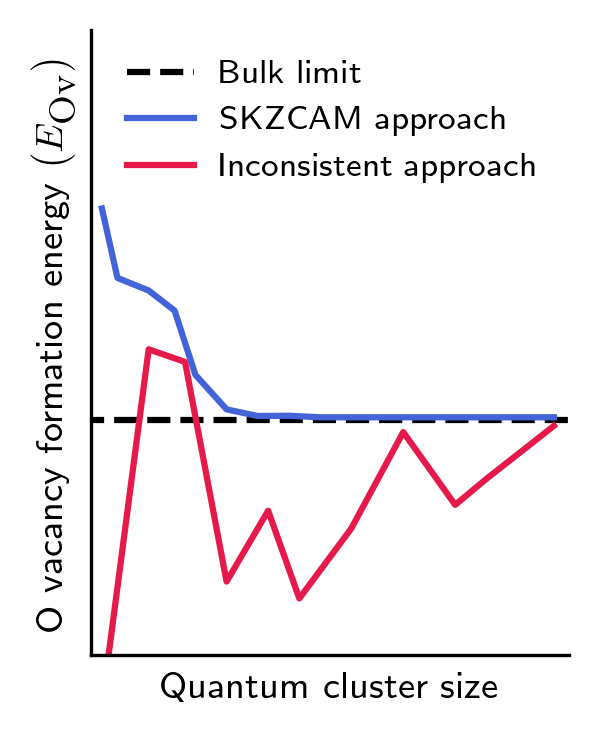

In [7]:
# Plots out the schematic graph in Fig_01

fig, axs = plt.subplots(1,3,figsize=(6.69,3),dpi=300)

for ax in axs[:2]:
    ax.remove()

RDF_sizes = np.loadtxt('02-Simulation_Data/Fig_01-Embedded_Cluster_Schematic/Calculations/RDF/energies_perfect_TZVPP')[:,0]
RDF_eov = (np.loadtxt('02-Simulation_Data/Fig_01-Embedded_Cluster_Schematic/Calculations/RDF/energies_defect_TZVPP')[:,1] + O_ene_PBE_TZVPP \
     - np.loadtxt('02-Simulation_Data/Fig_01-Embedded_Cluster_Schematic/Calculations/RDF/energies_perfect_TZVPP')[:,1])*Hartree - O2_bind_ene['PBE']/2 - 0.025
RDF_eov_SVP = (np.loadtxt('02-Simulation_Data/Fig_01-Embedded_Cluster_Schematic/Calculations/RDF_SVP/energies_defect_SVP')[:,1] + O_ene_PBE_SVP \
     - np.loadtxt('02-Simulation_Data/Fig_01-Embedded_Cluster_Schematic/Calculations/RDF_SVP/energies_perfect_SVP')[:,1])*Hartree - O2_bind_ene['PBE']/2 - 0.025

SVP2TZVPP_corr = np.average(RDF_eov[9:] - RDF_eov_SVP[9:]) # This shifts the SVP calculation to TZVPP level for the stoichoimetric clusters

Stoic_sizes = np.loadtxt('02-Simulation_Data/Fig_01-Embedded_Cluster_Schematic/Calculations/Stoic/energies_defect_SVP')[:,0]
Stoic_eov = (np.loadtxt('02-Simulation_Data/Fig_01-Embedded_Cluster_Schematic/Calculations/Stoic/energies_defect_SVP')[:,1] + O_ene_PBE_SVP \
     - np.loadtxt('02-Simulation_Data/Fig_01-Embedded_Cluster_Schematic/Calculations/Stoic/energies_perfect_SVP')[:,1])*Hartree - O2_bind_ene['PBE']/2 -0.025 + SVP2TZVPP_corr 

axs[2].plot([-2,130], np.array([eov_bulk_lim['PBE_TiO2_Bulk'],eov_bulk_lim['PBE_TiO2_Bulk']]),'k--',linewidth=1.5,label='Bulk limit')

axs[2].plot(np.append(RDF_sizes[::2],89),np.append(RDF_eov[::2],RDF_eov[-1]), label='SKZCAM approach')
axs[2].plot(Stoic_sizes,Stoic_eov, label=r'Inconsistent approach')

axs[2].set_ylabel(r'O vacancy formation energy $\left ( E_\textrm{Ov} \right )$')
axs[2].set_xlabel(r'Quantum cluster size')
axs[2].set_xlim([0,92])
axs[2].set_ylim([5.2,6.3])
axs[2].legend(fancybox=False,fontsize=8,frameon=False,loc='upper right')
axs[2].set_yticklabels([])
axs[2].set_xticklabels([])
axs[2].set_xticks([])
axs[2].set_yticks([])
axs[2].spines['right'].set_visible(False)
axs[2].spines['top'].set_visible(False)

plt.tight_layout(pad=3)
plt.savefig('03-Figures/Fig_01.jpg')



### Figure 2 - RDF versus Stoichiometric quantum clusters 

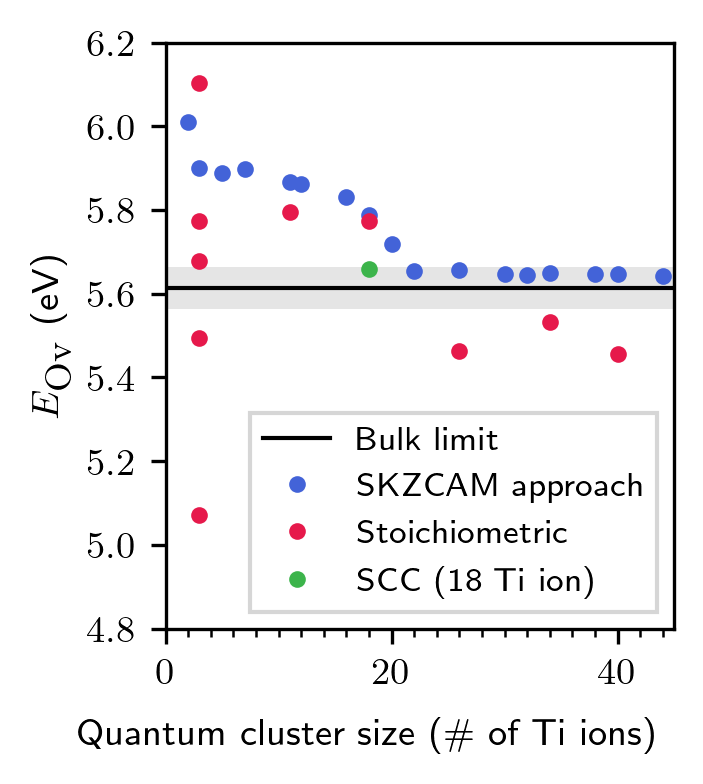

In [8]:

RDF_sizes = np.loadtxt('02-Simulation_Data/Fig_02-SKZCAM_Schematic/Calculations/RDF/energies_perfect_TZVPP')[:,0]
RDF_eov = (np.loadtxt('02-Simulation_Data/Fig_02-SKZCAM_Schematic/Calculations/RDF/energies_defect_TZVPP')[:,1] + O_ene_PBE_TZVPP \
     - np.loadtxt('02-Simulation_Data/Fig_02-SKZCAM_Schematic/Calculations/RDF/energies_perfect_TZVPP')[:,1])*Hartree - O2_bind_ene['PBE']/2

Stoic_sizes = np.loadtxt('02-Simulation_Data/Fig_02-SKZCAM_Schematic/Calculations/Stoic/energies_perfect_TZVPP')[:,0]
Stoic_eov = (np.loadtxt('02-Simulation_Data/Fig_02-SKZCAM_Schematic/Calculations/Stoic/energies_defect_TZVPP')[:,1] + O_ene_PBE_TZVPP \
     - np.loadtxt('02-Simulation_Data/Fig_02-SKZCAM_Schematic/Calculations/Stoic/energies_perfect_TZVPP')[:,1])*Hartree - O2_bind_ene['PBE']/2

Ti3_configurations_eov = (np.loadtxt('02-Simulation_Data/Fig_02-SKZCAM_Schematic/Calculations/Stoic/energies_Ti3_configurations_defect_TZVPP')[:,1] + O_ene_PBE_TZVPP \
     - np.loadtxt('02-Simulation_Data/Fig_02-SKZCAM_Schematic/Calculations/Stoic/energies_Ti3_configurations_perfect_TZVPP')[:,1])*Hartree - O2_bind_ene['PBE']/2

SCC_eov = (np.loadtxt('02-Simulation_Data/Fig_02-SKZCAM_Schematic/Calculations/SCC/energies_defect_TZVPP')[1] + O_ene_PBE_TZVPP \
     - np.loadtxt('02-Simulation_Data/Fig_02-SKZCAM_Schematic/Calculations/SCC/energies_perfect_TZVPP')[1])*Hartree - O2_bind_ene['PBE']/2

fig, axs = plt.subplots(figsize=(2.23,2.5),dpi=300, constrained_layout=True)

axs.fill_between([-10,150],[eov_bulk_lim['PBE_TiO2_Bulk']+0.05, eov_bulk_lim['PBE_TiO2_Bulk']+0.05],[eov_bulk_lim['PBE_TiO2_Bulk']-0.05,\
     eov_bulk_lim['PBE_TiO2_Bulk']-0.05],color='tab:gray',edgecolor=None,alpha=0.2)
axs.plot([-2,130], np.array([eov_bulk_lim['PBE_TiO2_Bulk'],eov_bulk_lim['PBE_TiO2_Bulk']]),'k-',linewidth=1,label='Bulk limit')
axs.plot(RDF_sizes, RDF_eov, 'o',markersize=4,markeredgewidth=0.0,color=color_dict['blue'], label='SKZCAM approach')
axs.plot(Stoic_sizes, Stoic_eov, 'o',markersize=4,markeredgewidth=0.0,linewidth=0,color=color_dict['red'], label='Stoichiometric')
axs.plot([3]*6, Ti3_configurations_eov, 'o',markersize=4,markeredgewidth=0.0,color=color_dict['red'])
axs.plot([18],SCC_eov,'o',markersize=4,markeredgewidth=0.0,color=color_dict['green'],label='SCC (18 Ti ion)')


axs.set_xlim([0,45])
axs.set_ylim([4.8,6.2])
axs.set_ylabel(r'$E_\textrm{Ov}$ (eV)')
axs.set_xlabel(r'Quantum cluster size (\# of Ti ions)')
axs.legend(fontsize=8,fancybox=False,loc='lower right')
axs.xaxis.set_label_coords(0.4, -0.15)
axs.set_yticks([4.8,5.0,5.2,5.4,5.6,5.8,6.0,6.2])
axs.xaxis.set_minor_locator(MultipleLocator(2))


plt.savefig('03-Figures/Fig_02.jpg')


### Figure 3 + Table S8 - EOv change with RDF cluster size for all 4 systems

Bulk MgO SVP to TZVPP basis set correction      :     -0.372
Surface MgO SVP to TZVPP basis set correction   :     -0.254


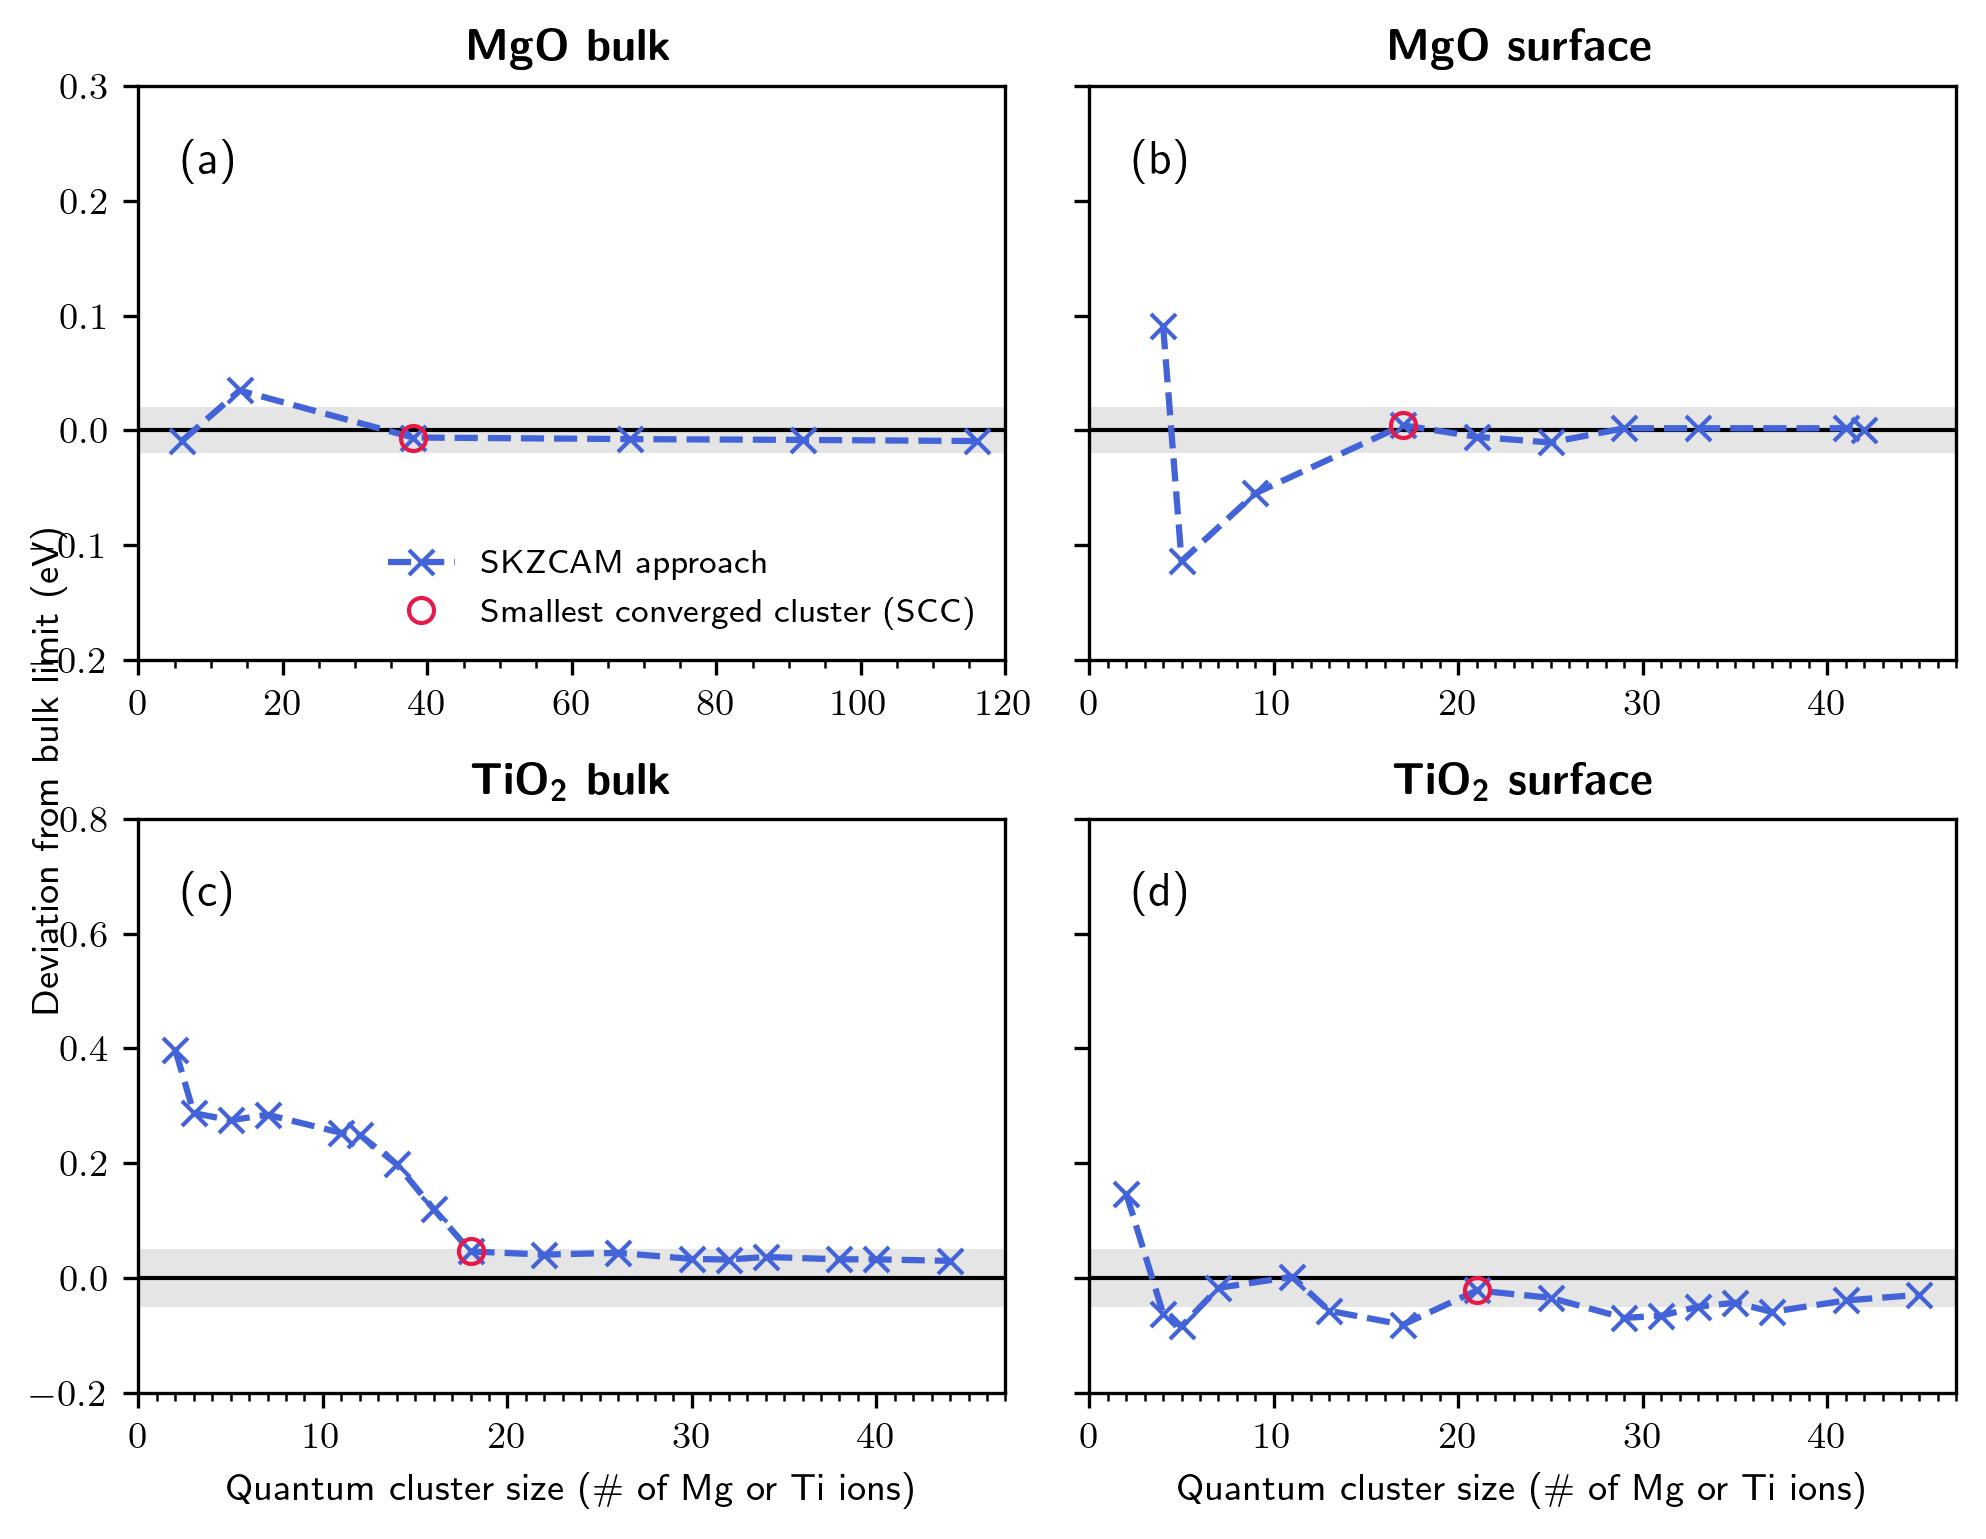

In [9]:
RDF_MgO_bulk_sizes = np.loadtxt('02-Simulation_Data/Fig_03+Table_S08-SKZCAM_Size_Convergence/Calculations/MgO_Bulk/energies_defect_SVP')[:,0]
RDF_MgO_bulk_eov_SVP = (np.loadtxt('02-Simulation_Data/Fig_03+Table_S08-SKZCAM_Size_Convergence/Calculations/MgO_Bulk/energies_defect_SVP')[:,1] + O_ene_PBE_SVP \
     - np.loadtxt('02-Simulation_Data/Fig_03+Table_S08-SKZCAM_Size_Convergence/Calculations/MgO_Bulk/energies_perfect_SVP')[:,1])*Hartree - O2_bind_ene['PBE']/2
RDF_MgO_bulk_eov_TZVPP = (np.loadtxt('02-Simulation_Data/Fig_03+Table_S08-SKZCAM_Size_Convergence/Calculations/MgO_Bulk/energies_defect_TZVPP')[:,1] + O_ene_PBE_TZVPP \
     - np.loadtxt('02-Simulation_Data/Fig_03+Table_S08-SKZCAM_Size_Convergence/Calculations/MgO_Bulk/energies_perfect_TZVPP')[:,1])*Hartree - O2_bind_ene['PBE']/2
SVP_to_TZVPP_corr_MgO_bulk = np.average(RDF_MgO_bulk_eov_TZVPP - RDF_MgO_bulk_eov_SVP[2:4])
print('Bulk MgO SVP to TZVPP basis set correction      :     {0:.3f}'.format(SVP_to_TZVPP_corr_MgO_bulk))

RDF_MgO_bulk_eov = RDF_MgO_bulk_eov_SVP + SVP_to_TZVPP_corr_MgO_bulk

RDF_MgO_surf_sizes = np.loadtxt('02-Simulation_Data/Fig_03+Table_S08-SKZCAM_Size_Convergence/Calculations/MgO_Surface/energies_defect_SVP')[:,0]
RDF_MgO_surf_eov_SVP = (np.loadtxt('02-Simulation_Data/Fig_03+Table_S08-SKZCAM_Size_Convergence/Calculations/MgO_Surface/energies_defect_SVP')[:,1] + O_ene_PBE_SVP \
     - np.loadtxt('02-Simulation_Data/Fig_03+Table_S08-SKZCAM_Size_Convergence/Calculations/MgO_Surface/energies_perfect_SVP')[:,1])*Hartree - O2_bind_ene['PBE']/2
RDF_MgO_surf_eov_TZVPP = (np.loadtxt('02-Simulation_Data/Fig_03+Table_S08-SKZCAM_Size_Convergence/Calculations/MgO_Surface/energies_defect_TZVPP')[:,1] + O_ene_PBE_TZVPP \
     - np.loadtxt('02-Simulation_Data/Fig_03+Table_S08-SKZCAM_Size_Convergence/Calculations/MgO_Surface/energies_perfect_TZVPP')[:,1])*Hartree - O2_bind_ene['PBE']/2
SVP_to_TZVPP_corr_MgO_surf = np.average(RDF_MgO_surf_eov_TZVPP - RDF_MgO_surf_eov_SVP[3:6])
RDF_MgO_surf_eov = RDF_MgO_surf_eov_SVP + SVP_to_TZVPP_corr_MgO_surf
print('Surface MgO SVP to TZVPP basis set correction   :     {0:.3f}'.format(SVP_to_TZVPP_corr_MgO_surf))



RDF_TiO2_bulk_sizes = np.loadtxt('02-Simulation_Data/Fig_03+Table_S08-SKZCAM_Size_Convergence/Calculations/TiO2_Bulk/energies_defect_TZVPP')[:,0]
RDF_TiO2_bulk_eov = (np.loadtxt('02-Simulation_Data/Fig_03+Table_S08-SKZCAM_Size_Convergence/Calculations/TiO2_Bulk/energies_defect_TZVPP')[:,1] + O_ene_PBE_TZVPP \
     - np.loadtxt('02-Simulation_Data/Fig_03+Table_S08-SKZCAM_Size_Convergence/Calculations/TiO2_Bulk/energies_perfect_TZVPP')[:,1])*Hartree - O2_bind_ene['PBE']/2

RDF_TiO2_surf_sizes = np.loadtxt('02-Simulation_Data/Fig_03+Table_S08-SKZCAM_Size_Convergence/Calculations/TiO2_Surface/energies_defect_TZVPP')[:,0]
RDF_TiO2_surf_eov = (np.loadtxt('02-Simulation_Data/Fig_03+Table_S08-SKZCAM_Size_Convergence/Calculations/TiO2_Surface/energies_defect_TZVPP')[:,1] + O_ene_PBE0_TZVPP \
     - np.loadtxt('02-Simulation_Data/Fig_03+Table_S08-SKZCAM_Size_Convergence/Calculations/TiO2_Surface/energies_perfect_TZVPP')[:,1])*Hartree - O2_bind_ene['PBE0']/2


fig, axs = plt.subplots(nrows=2,ncols=2, figsize=(6.69,5.2), sharey='row',dpi=300)


axs[0,0].plot([-10,150],[0.0,0.0],'-k',linewidth=1)
axs[0,0].fill_between([-10,150],[+0.02, +0.02],[-0.02, -0.02],color='tab:gray',edgecolor=None,alpha=0.2)
axs[0,0].plot(RDF_MgO_bulk_sizes,RDF_MgO_bulk_eov - eov_bulk_lim['PBE_MgO_Bulk'],'x--',color=color_dict['blue'],label='SKZCAM approach')
axs[0,0].plot(RDF_MgO_bulk_sizes[2],(RDF_MgO_bulk_eov)[2] - eov_bulk_lim['PBE_MgO_Bulk'],marker='o',markeredgewidth=1.0,\
     markerfacecolor="None", linewidth=0,color=color_dict['red'],label='Smallest converged cluster (SCC)')
axs[0,0].set_title(r'\textbf{MgO bulk}')
axs[0,0].text(0.05,0.85,'(a)', transform=axs[0,0].transAxes,fontsize=11)
axs[0,0].legend(fancybox=False,frameon=False,fontsize=8,loc='lower right')


axs[0,1].plot([-10,150],[0.0,0.0],'-k',linewidth=1)
axs[0,1].fill_between([-10,150],[+0.02, +0.02],[-0.02, -0.02],color='tab:gray',edgecolor=None,alpha=0.2)
axs[0,1].plot(RDF_MgO_surf_sizes,RDF_MgO_surf_eov - eov_bulk_lim['PBE_MgO_Surface'],'x--',color=color_dict['blue'],label='SKZCAM approach')
axs[0,1].plot(RDF_MgO_surf_sizes[3],RDF_MgO_surf_eov[3] - eov_bulk_lim['PBE_MgO_Surface'],marker='o',markeredgewidth=1.0,\
     markerfacecolor="None", linewidth=0,color=color_dict['red'],label='Smallest converged cluster (SCC)')
axs[0,1].set_title(r'\textbf{MgO surface}')
axs[0,1].text(0.05,0.85,'(b)', transform=axs[0,1].transAxes,fontsize=11)

axs[1,0].plot([-10,150],[0.0,0.0],'-k',linewidth=1)
axs[1,0].fill_between([-10,150],[+0.05, +0.05],[-0.05, -0.05],color='tab:gray',edgecolor=None,alpha=0.2)
axs[1,0].plot(RDF_TiO2_bulk_sizes,RDF_TiO2_bulk_eov - eov_bulk_lim['PBE_TiO2_Bulk'],'x--',color=color_dict['blue'],label='SKZCAM approach')
axs[1,0].plot(RDF_TiO2_bulk_sizes[8],RDF_TiO2_bulk_eov[8] - eov_bulk_lim['PBE_TiO2_Bulk'],marker='o',markeredgewidth=1.0,\
     markerfacecolor="None", linewidth=0,color=color_dict['red'],label='Smallest converged cluster (SCC)')
axs[1,0].set_xlabel(r'Quantum cluster size (\# of Mg or Ti ions)')
axs[1,0].set_title(r'\textbf{TiO\textsubscript{2} bulk}')
axs[1,0].text(0.05,0.85,'(c)', transform=axs[1,0].transAxes,fontsize=11)
axs[1,0].set_ylabel(r'$\quad$ ')
fig.text(0.02, 0.5, 'Deviation from bulk limit (eV)', va='center', rotation='vertical')


axs[1,1].plot([-10,150],[0.0,0.0],'-k',linewidth=1)
axs[1,1].fill_between([-10,150],[+0.05, +0.05],[-0.05, -0.05],color='tab:gray',edgecolor=None,alpha=0.2)
axs[1,1].plot(RDF_TiO2_surf_sizes[:16], RDF_TiO2_surf_eov - eov_bulk_lim['PBE0_TiO2_Surface_2x6'] ,'x--',color=color_dict['blue'])
axs[1,1].plot(RDF_TiO2_surf_sizes[7], RDF_TiO2_surf_eov[7] - eov_bulk_lim['PBE0_TiO2_Surface_2x6'],marker='o',markeredgewidth=1.0,\
     markerfacecolor="None", linewidth=0,color=color_dict['red'])
axs[1,1].set_xlabel(r'Quantum cluster size (\# of Mg or Ti ions)')
axs[1,1].set_title(r'\textbf{TiO\textsubscript{2} surface}')
axs[1,1].text(0.05,0.85,'(d)', transform=axs[1,1].transAxes,fontsize=11)

axs[0,0].set_xlim([0,120])
axs[0,0].set_ylim([-0.2, 0.3])
axs[0,0].set_yticks([-0.2,-0.1,0.00,0.1,0.2,0.3])
axs[0,0].xaxis.set_minor_locator(MultipleLocator(5))

axs[0,1].set_xlim([0,47])
axs[0,1].set_ylim([-0.2, 0.3])
axs[0,1].xaxis.set_minor_locator(MultipleLocator(1))
axs[0,1].set_yticks([-0.2,-0.1,0.00,0.1,0.2,0.3])

axs[1,0].set_xlim([0,47])
axs[1,0].set_ylim([-0.2,0.8])
axs[1,0].xaxis.set_minor_locator(MultipleLocator(1))

axs[1,1].set_xlim([0,47])
axs[1,1].set_ylim([-0.2,+0.8])
axs[1,1].xaxis.set_minor_locator(MultipleLocator(1))

fig.tight_layout()
plt.savefig('03-Figures/Fig_03.jpg')

### Figure 4 - Change in EOv with quantum cluster size for different levels of theory

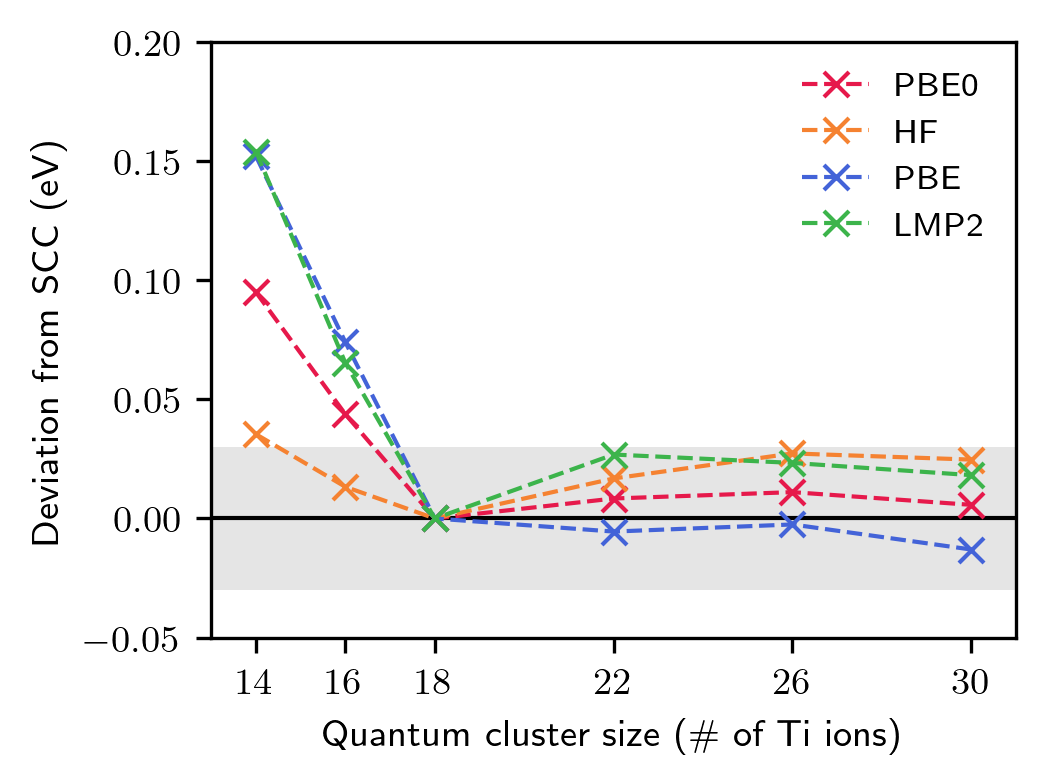

In [7]:
eov_scc_updown_PBE = (np.loadtxt('02-Simulation_Data/Fig_04-cWFT_Size_Convergence/Calculations/PBE/energies_defect_TZVPP')[:,1] + O_ene_PBE_TZVPP\
    -  np.loadtxt('02-Simulation_Data/Fig_04-cWFT_Size_Convergence/Calculations/PBE/energies_perfect_TZVPP')[:,1])*Hartree - O2_bind_ene['PBE']/2
eov_scc_updown_PBE0 = (np.loadtxt('02-Simulation_Data/Fig_04-cWFT_Size_Convergence/Calculations/PBE0/energies_defect_TZVPP')[:,1] + O_ene_PBE0_TZVPP\
    -  np.loadtxt('02-Simulation_Data/Fig_04-cWFT_Size_Convergence/Calculations/PBE0/energies_perfect_TZVPP')[:,1])*Hartree - O2_bind_ene['PBE0']/2
eov_scc_updown_MP2 = (np.loadtxt('02-Simulation_Data/Fig_04-cWFT_Size_Convergence/Calculations/LMP2+HF/energies_MP2_defect_TZVPP')[:,1] + O_ene_LMP2_TZVPP \
    - np.loadtxt('02-Simulation_Data/Fig_04-cWFT_Size_Convergence/Calculations/LMP2+HF/energies_MP2_perfect_TZVPP')[:,1])*Hartree - O2_bind_ene['LMP2']/2
eov_scc_updown_HF = (np.loadtxt('02-Simulation_Data/Fig_04-cWFT_Size_Convergence/Calculations/LMP2+HF/energies_HF_defect_TZVPP')[:,1] + O_ene_HF_TZVPP \
     - np.loadtxt('02-Simulation_Data/Fig_04-cWFT_Size_Convergence/Calculations/LMP2+HF/energies_HF_perfect_TZVPP')[:,1])*Hartree -  O2_bind_ene['PBE']/2 # Not important to have correct binding energy

fig, axs_10_inset = plt.subplots(figsize=(3.37,2.5), dpi=300,constrained_layout=True)

cluster_sizes = np.array([14,16,18,22,26,30])


axs_10_inset.plot([-10,150],[0.0,0.0],'-k',linewidth=1)
axs_10_inset.fill_between([-10,150],[+0.03, +0.03],[-0.03, -0.03],color='tab:gray',edgecolor=None,alpha=0.2)
axs_10_inset.plot(cluster_sizes,(eov_scc_updown_PBE0- eov_scc_updown_PBE0[2]), 'x--',color=color_dict['red'],label='PBE0',linewidth=1)
axs_10_inset.plot(cluster_sizes,(eov_scc_updown_HF- eov_scc_updown_HF[2]), 'x--',color=color_dict['orange'],label='HF',linewidth=1)
axs_10_inset.plot(cluster_sizes,(eov_scc_updown_PBE- eov_scc_updown_PBE[2]), 'x--',color=color_dict['blue'],label='PBE',linewidth=1)
axs_10_inset.plot(cluster_sizes,(eov_scc_updown_MP2- eov_scc_updown_MP2[2]), 'x--',color=color_dict['green'],label='LMP2',linewidth=1)

axs_10_inset.set_xlim([13,31])
axs_10_inset.set_ylim([-0.05,0.20])
axs_10_inset.legend(fontsize=8,frameon=False,fancybox=False,loc='upper right')
axs_10_inset.set_ylabel('Deviation from SCC (eV)')
axs_10_inset.set_xticks(cluster_sizes)
axs_10_inset.set_yticks([-0.05,0.00,0.05,0.10,0.15,0.20])
axs_10_inset.set_xlabel(r'Quantum cluster size (\# of Ti ions)')

plt.savefig('03-Figures/Fig_04.jpg')


### Table S5 - Basis set and frozen core correction for cWFT calculations including double hybrid B2PLYP

In [8]:
from cluster_scripts import *

eov_correction = dict.fromkeys(['MgO Bulk','MgO Surface','TiO2 Bulk','TiO2 Surface'])
for i in eov_correction:
        eov_correction[i] = {'LB2PLYP':0.0, 'LMP2':0.0, 'LNO-CCSD':0.0, 'LNO-CCSD(T)':0.0}

capitalize_dict = {'lmp2': 'LMP2', 'lccsd':'LNO-CCSD','lccsdt':'LNO-CCSD(T)'}

# MgO Surface
for i in ['lmp2','lccsd','lccsdt']:
        eov_correction['MgO Surface'][capitalize_dict[i]] = get_corr_mrcc('02-Simulation_Data/Table_S05-Basis_Set+Frozen_Core_Corrections/Calculations/MgO_Surface/CCSDT/4',i)[-1]
eov_correction['MgO Surface']['LB2PLYP'] = get_corr_mrcc_b2plyp('02-Simulation_Data/Table_S05-Basis_Set+Frozen_Core_Corrections/Calculations/MgO_Surface/B2PLYP/4')[2]

# MgO Bulk
for i in ['lmp2','lccsd','lccsdt']:
        eov_correction['MgO Bulk'][capitalize_dict[i]] = get_corr_mrcc('02-Simulation_Data/Table_S05-Basis_Set+Frozen_Core_Corrections/Calculations/MgO_Bulk/CCSDT/1',i)[-1]
eov_correction['MgO Bulk']['LB2PLYP'] = get_corr_mrcc_b2plyp('02-Simulation_Data/Table_S05-Basis_Set+Frozen_Core_Corrections/Calculations/MgO_Bulk/B2PLYP/1')[2]

# TiO2 Bulk
for i in ['lmp2','lccsd','lccsdt']:
        method_correction = 0
        for j in ['2','3']:
                method_correction += get_corr_mrcc('02-Simulation_Data/Table_S05-Basis_Set+Frozen_Core_Corrections/Calculations/TiO2_Bulk/CCSDT/{0}'.format(j),i)[-1]/2
        eov_correction['TiO2 Bulk'][capitalize_dict[i]] = method_correction

method_correction = 0
for j in ['2', '3']:
        method_correction += get_corr_mrcc_b2plyp('02-Simulation_Data/Table_S05-Basis_Set+Frozen_Core_Corrections/Calculations/TiO2_Bulk/B2PLYP/{0}'.format(j))[2]/2
eov_correction['TiO2 Bulk']['LB2PLYP'] = method_correction

# TiO2 Surface

for i in ['lmp2','lccsd','lccsdt']:
        method_correction = 0
        for j in ['1','2']:
                method_correction += get_corr_mrcc('02-Simulation_Data/Table_S05-Basis_Set+Frozen_Core_Corrections/Calculations/TiO2_Surface/CCSDT/{0}'.format(j),i)[-1]/2
        eov_correction['TiO2 Surface'][capitalize_dict[i]] = method_correction

method_correction = 0
for j in ['1','2']:
        method_correction += get_corr_mrcc_b2plyp('02-Simulation_Data/Table_S05-Basis_Set+Frozen_Core_Corrections/Calculations/TiO2_Surface/B2PLYP/{0}'.format(j))[2]/2
eov_correction['TiO2 Surface']['LB2PLYP'] = method_correction

df = pd.DataFrame(eov_correction)
df = df.round(decimals=2)
print(df)


             MgO Bulk  MgO Surface  TiO2 Bulk  TiO2 Surface
LB2PLYP          0.00         0.05      -0.02         -0.04
LMP2             0.04         0.13      -0.14         -0.21
LNO-CCSD         0.06         0.14       0.07          0.14
LNO-CCSD(T)      0.06         0.16       0.09          0.07


### Figure 5, Table 1 and Table S12 - Final DFT and cWFT EOv values and DFT XC functional errors

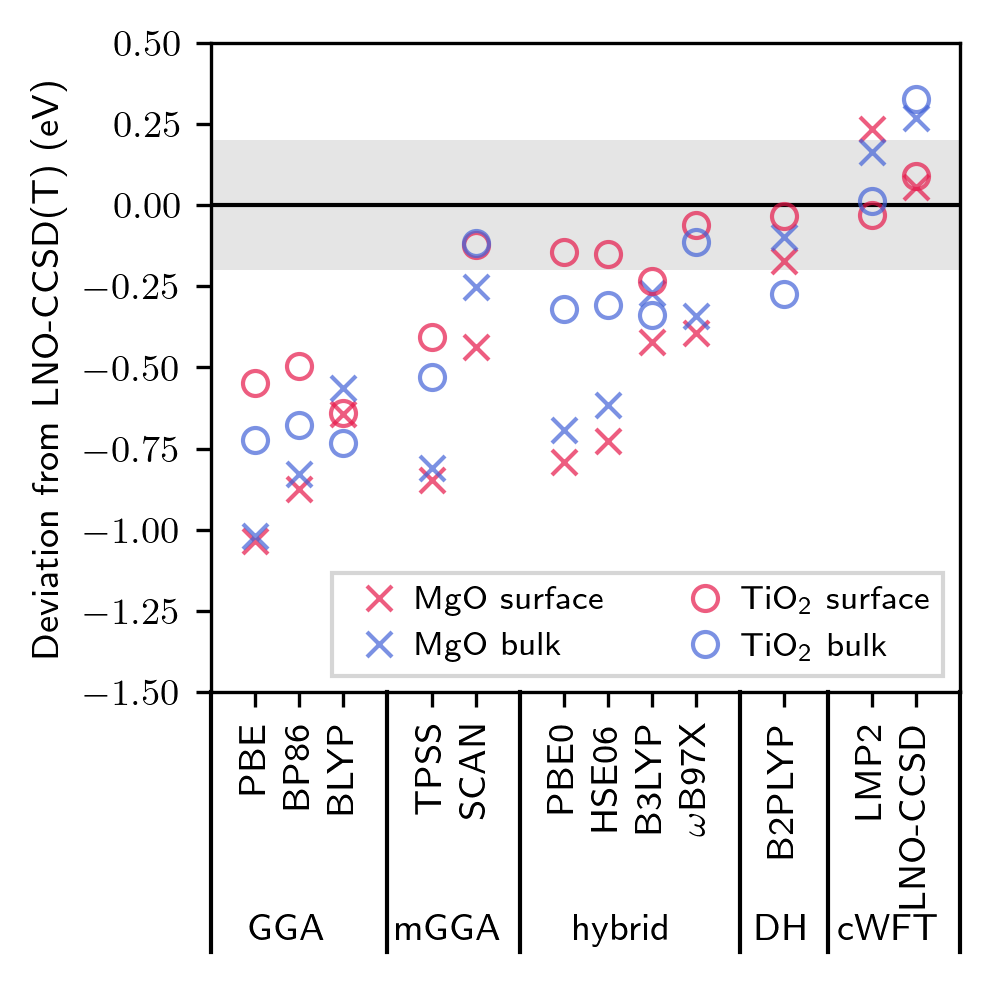

In [11]:
from cluster_scripts import *

eov_final = dict.fromkeys(['MgO Bulk','MgO Surface','TiO2 Bulk','TiO2 Surface'])

all_methods = ['PBE','BP86','BLYP','TPSS','SCAN','PBE0','HSE06','B3LYP','wB97X','LB2PLYP','LMP2','LNO-CCSD','LNO-CCSD(T)']
mrcc_XC_functionals = ['BLYP','BP86','PBE','SCAN','TPSS','B3LYP','PBE0','HSE06']

for i in ['MgO Bulk','MgO Surface','TiO2 Bulk','TiO2 Surface']:
        eov_final[i] = {i : 0.0 for i in all_methods}

# Computing the EOv values for the DFT functionals first
for i in mrcc_XC_functionals:
        eov_final['MgO Bulk'][i] = get_dft_vac_energy("02-Simulation_Data/Fig_05+Table_01+Table_S12-Final_EOv_and_Errors/Calculations/MgO_Bulk/{0}".format(i)) - O2_bind_ene[i]/2
        eov_final['MgO Surface'][i] = get_dft_vac_energy("02-Simulation_Data/Fig_05+Table_01+Table_S12-Final_EOv_and_Errors/Calculations/MgO_Surface/{0}".format(i)) - O2_bind_ene[i]/2
        eov_final['TiO2 Bulk'][i] = get_dft_vac_energy("02-Simulation_Data/Fig_05+Table_01+Table_S12-Final_EOv_and_Errors/Calculations/TiO2_Bulk/{0}".format(i)) - O2_bind_ene[i]/2
        eov_final['TiO2 Surface'][i] = get_dft_vac_energy("02-Simulation_Data/Fig_05+Table_01+Table_S12-Final_EOv_and_Errors/Calculations/TiO2_Surface/{0}".format(i)) - O2_bind_ene[i]/2

# Fixing issue with semilocal functionals not working in MRCC for TiO2 Surface
for i in  ['BLYP','BP86','PBE','SCAN','TPSS']:
    eov_final['TiO2 Surface'][i] = get_dft_vac_energy_orca("02-Simulation_Data/Fig_05+Table_01+Table_S12-Final_EOv_and_Errors/Calculations/TiO2_Surface/{0}".format(i)) - O2_bind_ene[i]/2

# Calculations were very slow with wB97X calculations in MRCC, so they were performed in ORCA
eov_final['MgO Surface']['wB97X'] = get_dft_vac_energy_orca("02-Simulation_Data/Fig_05+Table_01+Table_S12-Final_EOv_and_Errors/Calculations/MgO_Surface/wB97X".format(i)) - O2_bind_ene['wB97X']/2
eov_final['MgO Bulk']['wB97X'] = get_dft_vac_energy_orca_mgo_bulk("02-Simulation_Data/Fig_05+Table_01+Table_S12-Final_EOv_and_Errors/Calculations/MgO_Bulk/wB97X".format(i)) - O2_bind_ene['wB97X']/2 # TZVPP calculation used as SCF convergence issues for QZVPP
eov_final['TiO2 Surface']['wB97X'] = get_dft_vac_energy_orca("02-Simulation_Data/Fig_05+Table_01+Table_S12-Final_EOv_and_Errors/Calculations/TiO2_Surface/wB97X".format(i)) - O2_bind_ene['wB97X']/2
eov_final['TiO2 Bulk']['wB97X'] = get_dft_vac_energy_orca("02-Simulation_Data/Fig_05+Table_01+Table_S12-Final_EOv_and_Errors/Calculations/TiO2_Bulk/wB97X".format(i)) - O2_bind_ene['wB97X']/2

# Now calculating B2PLYP and cWFT methods using CBS(TZVPP/QZVPP) + the basis set and frozen core correction calculated in cell above

for i in ['MgO Bulk','MgO Surface','TiO2 Bulk','TiO2 Surface']:  
    ene_vac_hf = []
    ene_vac_mp2 = []
    nospace_name = '{0}_{1}'.format(i.split()[0],i.split()[1])
    for j in ['TZ','QZ']:
        ene_perfect = find_energy('02-Simulation_Data/Fig_05+Table_01+Table_S12-Final_EOv_and_Errors/Calculations/{0}/B2PLYP_{1}/perfect/mrcc.out'.format(nospace_name,j),typ='hf')
        ene_defect = find_energy('02-Simulation_Data/Fig_05+Table_01+Table_S12-Final_EOv_and_Errors/Calculations/{0}/B2PLYP_{1}/defect/mrcc.out'.format(nospace_name,j),typ='hf')
        ene_O = find_energy('02-Simulation_Data/Fig_05+Table_01+Table_S12-Final_EOv_and_Errors/Calculations/{0}/B2PLYP_{1}/O/mrcc.out'.format(nospace_name,j),typ='hf')
        ene_vac_hf += [(ene_defect + ene_O - ene_perfect)*Hartree]
        ene_perfect = find_energy('02-Simulation_Data/Fig_05+Table_01+Table_S12-Final_EOv_and_Errors/Calculations/{0}/B2PLYP_{1}/perfect/mrcc.out'.format(nospace_name,j),typ='B2PLYP')
        ene_defect = find_energy('02-Simulation_Data/Fig_05+Table_01+Table_S12-Final_EOv_and_Errors/Calculations/{0}/B2PLYP_{1}/defect/mrcc.out'.format(nospace_name,j),typ='B2PLYP')
        ene_O = find_energy('02-Simulation_Data/Fig_05+Table_01+Table_S12-Final_EOv_and_Errors/Calculations/{0}/B2PLYP_{1}/O/mrcc.out'.format(nospace_name,j),typ='B2PLYP')
        ene_vac_mp2 += [(ene_defect + ene_O - ene_perfect)*Hartree]
    eov_final[i]['LB2PLYP'] = extrapolate.get_cbs(ene_vac_hf[0],ene_vac_mp2[0],ene_vac_hf[1],ene_vac_mp2[1],X=3,Y=4,family='def2',output=False)[2] - O2_bind_ene['LB2PLYP']/2 \
         + eov_correction[i]['LB2PLYP']

capitalize_dict = {'lmp2': 'LMP2', 'lccsd':'LNO-CCSD','lccsdt':'LNO-CCSD(T)'}

# MgO Surface
for i in ['MgO Bulk','MgO Surface','TiO2 Bulk','TiO2 Surface']:
    nospace_name = '{0}_{1}'.format(i.split()[0],i.split()[1])
    for k in ['lmp2','lccsd','lccsdt']:  
        ene_vac_hf = []
        ene_vac_cwft = []
        for j in ['TZ','QZ']:    
            ene_perfect = find_energy('02-Simulation_Data/Fig_05+Table_01+Table_S12-Final_EOv_and_Errors/Calculations/{0}/CCSDT_{1}/perfect/mrcc.out'.format(nospace_name,j),typ='hf')
            ene_defect = find_energy('02-Simulation_Data/Fig_05+Table_01+Table_S12-Final_EOv_and_Errors/Calculations/{0}/CCSDT_{1}/defect/mrcc.out'.format(nospace_name,j),typ='hf')
            ene_O = find_energy('02-Simulation_Data/Fig_05+Table_01+Table_S12-Final_EOv_and_Errors/Calculations/{0}/CCSDT_{1}/O/mrcc.out'.format(nospace_name,j),typ='hf')
            ene_vac_hf += [(ene_defect + ene_O - ene_perfect)*Hartree]
            ene_perfect = find_energy('02-Simulation_Data/Fig_05+Table_01+Table_S12-Final_EOv_and_Errors/Calculations/{0}/CCSDT_{1}/perfect/mrcc.out'.format(nospace_name,j),typ=k)
            ene_defect = find_energy('02-Simulation_Data/Fig_05+Table_01+Table_S12-Final_EOv_and_Errors/Calculations/{0}/CCSDT_{1}/defect/mrcc.out'.format(nospace_name,j),typ=k)
            ene_O = find_energy('02-Simulation_Data/Fig_05+Table_01+Table_S12-Final_EOv_and_Errors/Calculations/{0}/CCSDT_{1}/O/mrcc.out'.format(nospace_name,j),typ=k[1:])
            ene_vac_cwft += [(ene_defect + ene_O - ene_perfect)*Hartree]

        eov_final[i][capitalize_dict[k]] = extrapolate.get_cbs(ene_vac_hf[0],ene_vac_cwft[0],ene_vac_hf[1],ene_vac_cwft[1],X=3,Y=4,shift=0.0,family='def2',output=False)[2] - O2_bind_ene[capitalize_dict[k]]/2 \
             + eov_correction[i][capitalize_dict[k]]

# Now obtaining the errors of the DFT methods
eov_error_final = dict.fromkeys(['MgO Bulk','MgO Surface','TiO2 Bulk','TiO2 Surface'])

all_methods = ['PBE','BP86','BLYP','TPSS','SCAN','PBE0','HSE06','B3LYP','wB97X','LB2PLYP','LMP2','LNO-CCSD','LNO-CCSD(T)']
dft_error_methods = ['PBE','BP86','BLYP','TPSS','SCAN','PBE0','HSE06','B3LYP','wB97X','LB2PLYP']

dft_mae_errors = dict.fromkeys(all_methods)
for i in all_methods:
    total_abs_error = 0
    for j in ['MgO Bulk','MgO Surface','TiO2 Bulk','TiO2 Surface']:
        total_abs_error += abs(eov_final[j][i] - eov_final[j]['LNO-CCSD(T)'])
    dft_mae_errors[i] = total_abs_error/4
        

for i in ['MgO Bulk','MgO Surface','TiO2 Bulk','TiO2 Surface','MAE']:
    if i == 'MAE':
        eov_error_final[i] = {i1 : 0.0 for i1 in all_methods + ['MAE']}
        total_abs_error = 0
        for j in all_methods:
            eov_error_final[i][j] = dft_mae_errors[j]
        eov_error_final[i]['MAE'] = 0.0
    else:        
        eov_error_final[i] = {i1 : 0.0 for i1 in all_methods + ['MAE']}
        total_abs_error = 0
        for j in all_methods:
            error = eov_final[i][j] - eov_final[i]['LNO-CCSD(T)']
            if j in dft_error_methods:
                total_abs_error += abs(error)
            eov_error_final[i][j] = error
        eov_error_final[i]['MAE'] = total_abs_error/len(dft_error_methods)


# EOv values using the experimental binding energy instead
eov_final_expt_bind = dict.fromkeys(['MgO Bulk','MgO Surface','TiO2 Bulk','TiO2 Surface'])

all_methods = ['PBE','BP86','BLYP','TPSS','SCAN','PBE0','HSE06','B3LYP','wB97X','LB2PLYP','LMP2','LNO-CCSD','LNO-CCSD(T)']

for i in ['MgO Bulk','MgO Surface','TiO2 Bulk','TiO2 Surface']:
    eov_final_expt_bind[i] = {i : 0.0 for i in all_methods}
    for j in all_methods:
        eov_final_expt_bind[i][j] = eov_final[i][j] + O2_bind_ene[j]/2 - 5.22/2

eov_error_final_expt_bind = dict.fromkeys(['MgO Bulk','MgO Surface','TiO2 Bulk','TiO2 Surface'])

all_methods = ['PBE','BP86','BLYP','TPSS','SCAN','PBE0','HSE06','B3LYP','wB97X','LB2PLYP','LMP2','LNO-CCSD','LNO-CCSD(T)']
dft_error_methods = ['PBE','BP86','BLYP','TPSS','SCAN','PBE0','HSE06','B3LYP','wB97X','LB2PLYP']

dft_mae_errors_expt_bind = dict.fromkeys(all_methods)
for i in all_methods:
    total_abs_error = 0
    for j in ['MgO Bulk','MgO Surface','TiO2 Bulk','TiO2 Surface']:
        total_abs_error += abs(eov_final_expt_bind[j][i] - eov_final_expt_bind[j]['LNO-CCSD(T)'])
    dft_mae_errors_expt_bind[i] = total_abs_error/4
        

for i in ['MgO Bulk','MgO Surface','TiO2 Bulk','TiO2 Surface','MAE']:
    if i == 'MAE':
        eov_error_final_expt_bind[i] = {i1 : 0.0 for i1 in all_methods + ['MAE']}
        total_abs_error = 0
        for j in all_methods:
            eov_error_final_expt_bind[i][j] = dft_mae_errors_expt_bind[j]
        eov_error_final_expt_bind[i]['MAE'] = 0.0
    else:        
        eov_error_final_expt_bind[i] = {i1 : 0.0 for i1 in all_methods + ['MAE']}
        total_abs_error = 0
        for j in all_methods:
            error = eov_final_expt_bind[i][j] - eov_final_expt_bind[i]['LNO-CCSD(T)']
            if j in dft_error_methods:
                total_abs_error += abs(error)
            eov_error_final_expt_bind[i][j] = error
        eov_error_final_expt_bind[i]['MAE'] = total_abs_error/len(dft_error_methods)


from matplotlib.lines import Line2D

fig, axs = plt.subplots(figsize=(3.37,3.2),dpi=300, sharex = True,tight_layout=True)

axs.plot([-1, 20],[0.0,0.0],'k-',linewidth=1)
axs.fill_between([-10,150],[+0.20, +0.20],[-0.20, -0.20],color='tab:gray',edgecolor=None,alpha=0.2)

eov_method_sorted_list = ['PBE','BP86','BLYP','TPSS','SCAN','PBE0','HSE06','B3LYP','wB97X','LB2PLYP','LMP2','LNO-CCSD']
eov_method_sorted_list_val = [1,2,3,5,6,8,9,10,11,13,15,16]

mgo_surf_errors_sorted_list = []
mgo_bulk_errors_sorted_list = []
tio2_surf_errors_sorted_list = []
tio2_bulk_errors_sorted_list = []

for i in eov_method_sorted_list:
    mgo_surf_errors_sorted_list += [eov_error_final['MgO Surface'][i]]
    mgo_bulk_errors_sorted_list += [eov_error_final['MgO Bulk'][i]]
    tio2_surf_errors_sorted_list += [eov_error_final['TiO2 Surface'][i]]
    tio2_bulk_errors_sorted_list += [eov_error_final['TiO2 Bulk'][i]]


axs.plot(eov_method_sorted_list_val,mgo_surf_errors_sorted_list, marker='x',markeredgewidth=1.0, markerfacecolor="None",color=color_dict['red'], linewidth=0,label='MgO surface',alpha=0.7)
axs.plot(eov_method_sorted_list_val,mgo_bulk_errors_sorted_list, marker='x', markeredgewidth=1.0, markerfacecolor="None",color=color_dict['blue'], linewidth=0, label='MgO bulk',alpha=0.7)
axs.plot(eov_method_sorted_list_val,tio2_surf_errors_sorted_list, marker='o', markeredgewidth=1.0, markerfacecolor="None",color=color_dict['red'], linewidth=0, label=r'TiO\textsubscript{2} surface',alpha=0.7)
axs.plot(eov_method_sorted_list_val,tio2_bulk_errors_sorted_list, marker='o', markeredgewidth=1.0, markerfacecolor="None",color=color_dict['blue'], linewidth=0, label=r'TiO\textsubscript{2} bulk',alpha=0.7)

axs.set_xticks(eov_method_sorted_list_val)
eov_method_sorted_list1 = ['PBE','BP86','BLYP','TPSS','SCAN','PBE0','HSE06','B3LYP',r'$\omega$B97X','B2PLYP','LMP2','LNO-CCSD']

axs.set_xticklabels(eov_method_sorted_list1,rotation=90)
axs.set_ylabel('Deviation from LNO-CCSD(T) (eV)')

for i in [0,4,7,12,14,17]:
    line = Line2D([i,i], [-1.5,-2.3], lw=1, color='k')
    line.set_clip_on(False)
    axs.add_line(line)

plt.figtext(0.295, 0.01, "GGA", ha="center", fontsize=9)
plt.figtext(0.455, 0.01, "mGGA", ha="center", fontsize=9)
plt.figtext(0.627, 0.01, "hybrid", ha="center", fontsize=9)
plt.figtext(0.785, 0.01, "DH", ha="center", fontsize=9)
plt.figtext(0.89, 0.01, "cWFT", ha="center", fontsize=9)
# cklabels(x)

axs.legend(fancybox=False,ncol=2,loc='lower right',fontsize=8,handletextpad=0.1)
axs.set_ylim([-1.5,0.5])
axs.set_xlim([0,17])

plt.savefig('03-Figures/Fig_05.jpg')



#### Final E<sub>Ov</sub> values using the corresponding method's binding energy



In [12]:
df1 = pd.DataFrame(eov_final)
rounded_df1 = df1.round(decimals=2)
print(rounded_df1)
# df1.to_csv('final_eov.csv')

             MgO Bulk  MgO Surface  TiO2 Bulk  TiO2 Surface
PBE              6.66         6.15       5.67          5.00
BP86             6.85         6.31       5.71          5.06
BLYP             7.11         6.54       5.66          4.91
TPSS             6.87         6.34       5.86          5.15
SCAN             7.43         6.74       6.27          5.43
PBE0             6.99         6.39       6.07          5.41
HSE06            7.06         6.46       6.08          5.40
B3LYP            7.41         6.76       6.05          5.32
wB97X            7.34         6.79       6.28          5.49
LB2PLYP          7.58         7.01       6.12          5.52
LMP2             7.84         7.41       6.40          5.52
LNO-CCSD         7.95         7.24       6.72          5.64
LNO-CCSD(T)      7.68         7.18       6.39          5.55


#### Errors in the final E<sub>Ov</sub> values (with method binding energy)

In [13]:
df2 = pd.DataFrame(eov_error_final)
rounded_df2 = df2.round(decimals=2)
print(rounded_df2)
# df2.to_csv('final_eov_error.csv')

             MgO Bulk  MgO Surface  TiO2 Bulk  TiO2 Surface   MAE
PBE             -1.02        -1.03      -0.72         -0.55  0.83
BP86            -0.83        -0.87      -0.68         -0.50  0.72
BLYP            -0.56        -0.64      -0.73         -0.64  0.64
TPSS            -0.81        -0.85      -0.53         -0.41  0.65
SCAN            -0.25        -0.44      -0.12         -0.12  0.23
PBE0            -0.69        -0.79      -0.32         -0.14  0.49
HSE06           -0.61        -0.73      -0.31         -0.15  0.45
B3LYP           -0.27        -0.42      -0.34         -0.23  0.32
wB97X           -0.34        -0.39      -0.11         -0.06  0.23
LB2PLYP         -0.10        -0.17      -0.27         -0.03  0.14
LMP2             0.16         0.23       0.01         -0.03  0.11
LNO-CCSD         0.27         0.06       0.33          0.09  0.19
LNO-CCSD(T)      0.00         0.00       0.00          0.00  0.00
MAE              0.55         0.63       0.41          0.28  0.00


#### Final E<sub>Ov</sub> values using the experimental binding energy

In [14]:
df3 = pd.DataFrame(eov_final_expt_bind)
rounded_df3 = df3.round(decimals=2)
print(rounded_df3)
# df3.to_csv('final_eov_expt.csv')

             MgO Bulk  MgO Surface  TiO2 Bulk  TiO2 Surface
PBE              7.16         6.64       6.16          5.50
BP86             7.31         6.77       6.18          5.52
BLYP             7.43         6.86       5.98          5.23
TPSS             7.00         6.47       5.99          5.28
SCAN             7.57         6.89       6.42          5.58
PBE0             7.07         6.47       6.15          5.49
HSE06            7.12         6.51       6.14          5.45
B3LYP            7.46         6.81       6.10          5.37
wB97X            7.43         6.88       6.37          5.58
LB2PLYP          7.65         7.08       6.19          5.59
LMP2             8.06         7.63       6.62          5.74
LNO-CCSD         7.74         7.03       6.51          5.43
LNO-CCSD(T)      7.65         7.15       6.36          5.52


#### Errors in the final E<sub>Ov</sub> values (with experimental binding energy)

In [15]:
df4 = pd.DataFrame(eov_error_final_expt_bind)
rounded_df4 = df4.round(decimals=2)
print(rounded_df4)
# df4.to_csv('final_eov_error_expt.csv')

             MgO Bulk  MgO Surface  TiO2 Bulk  TiO2 Surface   MAE
PBE             -0.49        -0.51      -0.20         -0.02  0.31
BP86            -0.34        -0.38      -0.19         -0.00  0.23
BLYP            -0.22        -0.29      -0.39         -0.29  0.30
TPSS            -0.65        -0.68      -0.37         -0.24  0.49
SCAN            -0.08        -0.26       0.06          0.06  0.11
PBE0            -0.58        -0.68      -0.21         -0.04  0.38
HSE06           -0.53        -0.64      -0.22         -0.07  0.37
B3LYP           -0.19        -0.34      -0.26         -0.15  0.24
wB97X           -0.22        -0.27       0.01          0.06  0.14
LB2PLYP         -0.00        -0.07      -0.18          0.06  0.08
LMP2             0.41         0.48       0.26          0.21  0.34
LNO-CCSD         0.09        -0.12       0.14         -0.09  0.11
LNO-CCSD(T)      0.00         0.00       0.00          0.00  0.00
MAE              0.33         0.41       0.21          0.10  0.00


### Table S1 - XC Dependence of the Ov Relaxation Energy in Rutile TiO<sub>2</sub>

In [16]:
xc_eov_rel = dict.fromkeys(['TiO2_Bulk','TiO2_Surface'])

XC_functionals = ['LDA','PBE','PBEsol','R2SCAN']


for i in ['TiO2_Bulk','TiO2_Surface']:
        xc_eov_rel[i] = {i : 0.0 for i in XC_functionals}

a = np.genfromtxt('02-Simulation_Data/Table_S01-TiO2_Relaxation_Energy_XC_Dependence/Calculations/energies_TiO2_Bulk',dtype=str)
b = np.genfromtxt('02-Simulation_Data/Table_S01-TiO2_Relaxation_Energy_XC_Dependence/Calculations/energies_TiO2_Surface',dtype=str)

for j in range(len(a)):
        xc_eov_rel['TiO2_Bulk'][a[j][0]] = float(a[j][2]) - float(a[j][1]) 
        xc_eov_rel['TiO2_Surface'][b[j][0]] = float(b[j][2]) - float(b[j][1])

df5 = pd.DataFrame(xc_eov_rel)
rounded_df5 = df5.round(decimals=2)
print(rounded_df5)


        TiO2_Bulk  TiO2_Surface
LDA          1.29          2.29
PBE          1.45          2.27
PBEsol       1.32          2.30
R2SCAN       1.00          2.08


### Table S3 - E<sub>Ov</sub> dependence on ECP and PC region lengths

In [17]:
ecp_pc_region_sizes = [['7.0','30'],['7.0','40'],['10.6','40']]

eov_region_list = []

a = np.genfromtxt('02-Simulation_Data/Table_S03-ECP+PC_Length_Convergence/Calculations/energies_SVP',dtype=float)

print('{0:10s} | {1:10s} | {2:5s}'.format(r'ECP (A)',r'PC (A)',r'EOv (eV)'))
print('-'*35)

for i in range(len(ecp_pc_region_sizes)):
    eov_region_list += [(a[i][1] + O_ene_PBE_SVP - a[i][2])*Hartree - O2_bind_ene['PBE']/2]
    print('{0:10s} | {1:10s} | {2:5.3f}'.format(ecp_pc_region_sizes[i][0],ecp_pc_region_sizes[i][1], \
        (a[i][1] + O_ene_PBE_SVP - a[i][2])*Hartree - O2_bind_ene['PBE']/2))
    



ECP (A)    | PC (A)     | EOv (eV)
-----------------------------------
7.0        | 30         | 5.501
7.0        | 40         | 5.513
10.6       | 40         | 5.513


### Table S4 - E<sub>Ov</sub> dependence on basis set size for DFT

In [18]:
eov_dft_basis = dict.fromkeys(['MgO_Bulk','MgO_Surface','TiO2_Bulk','TiO2_Surface'])

basis_set_def2 = ['SVP','TZVPP','QZVPP']
basis_set_def2_O_energies = [-74.92489598,-75.0186086,-75.02238828]


for i in ['MgO_Bulk','MgO_Surface','TiO2_Bulk','TiO2_Surface']:
        eov_dft_basis[i] = {i : 0.0 for i in basis_set_def2}


# SVP and TZVPP data taken from new data whilst QZVPP calculation taken from Figure 5 and Table 1
for i in range(4):
    for j in range(2):
        a = np.genfromtxt('02-Simulation_Data/Table_S04-DFT_Basis_Set_Convergence/Calculations/energies_PBE0_{0}'.format(basis_set_def2[j]),dtype=float)
        eov_dft_basis[['MgO_Bulk','MgO_Surface','TiO2_Bulk','TiO2_Surface'][i]][basis_set_def2[j]] = (a[i][1] + \
            basis_set_def2_O_energies[j] - a[i][0])*Hartree - O2_bind_ene['PBE0']/2
    eov_dft_basis[['MgO_Bulk','MgO_Surface','TiO2_Bulk','TiO2_Surface'][i]]['QZVPP'] = eov_final[['MgO_Bulk','MgO_Surface',\
        'TiO2_Bulk','TiO2_Surface'][i].replace('_',' ')]['PBE0']


df6 = pd.DataFrame(eov_dft_basis)
rounded_df6 = df6.round(decimals=2)
print(rounded_df6)


       MgO_Bulk  MgO_Surface  TiO2_Bulk  TiO2_Surface
SVP        7.33         6.66       6.10          5.39
TZVPP      6.97         6.37       6.06          5.42
QZVPP      6.99         6.39       6.07          5.41


### Figure S1 + Figure S2 - E<sub>Ov</sub> dependence on basis set size for LNO-CCSD(T) in MgO and TiO<sub>2</sub>

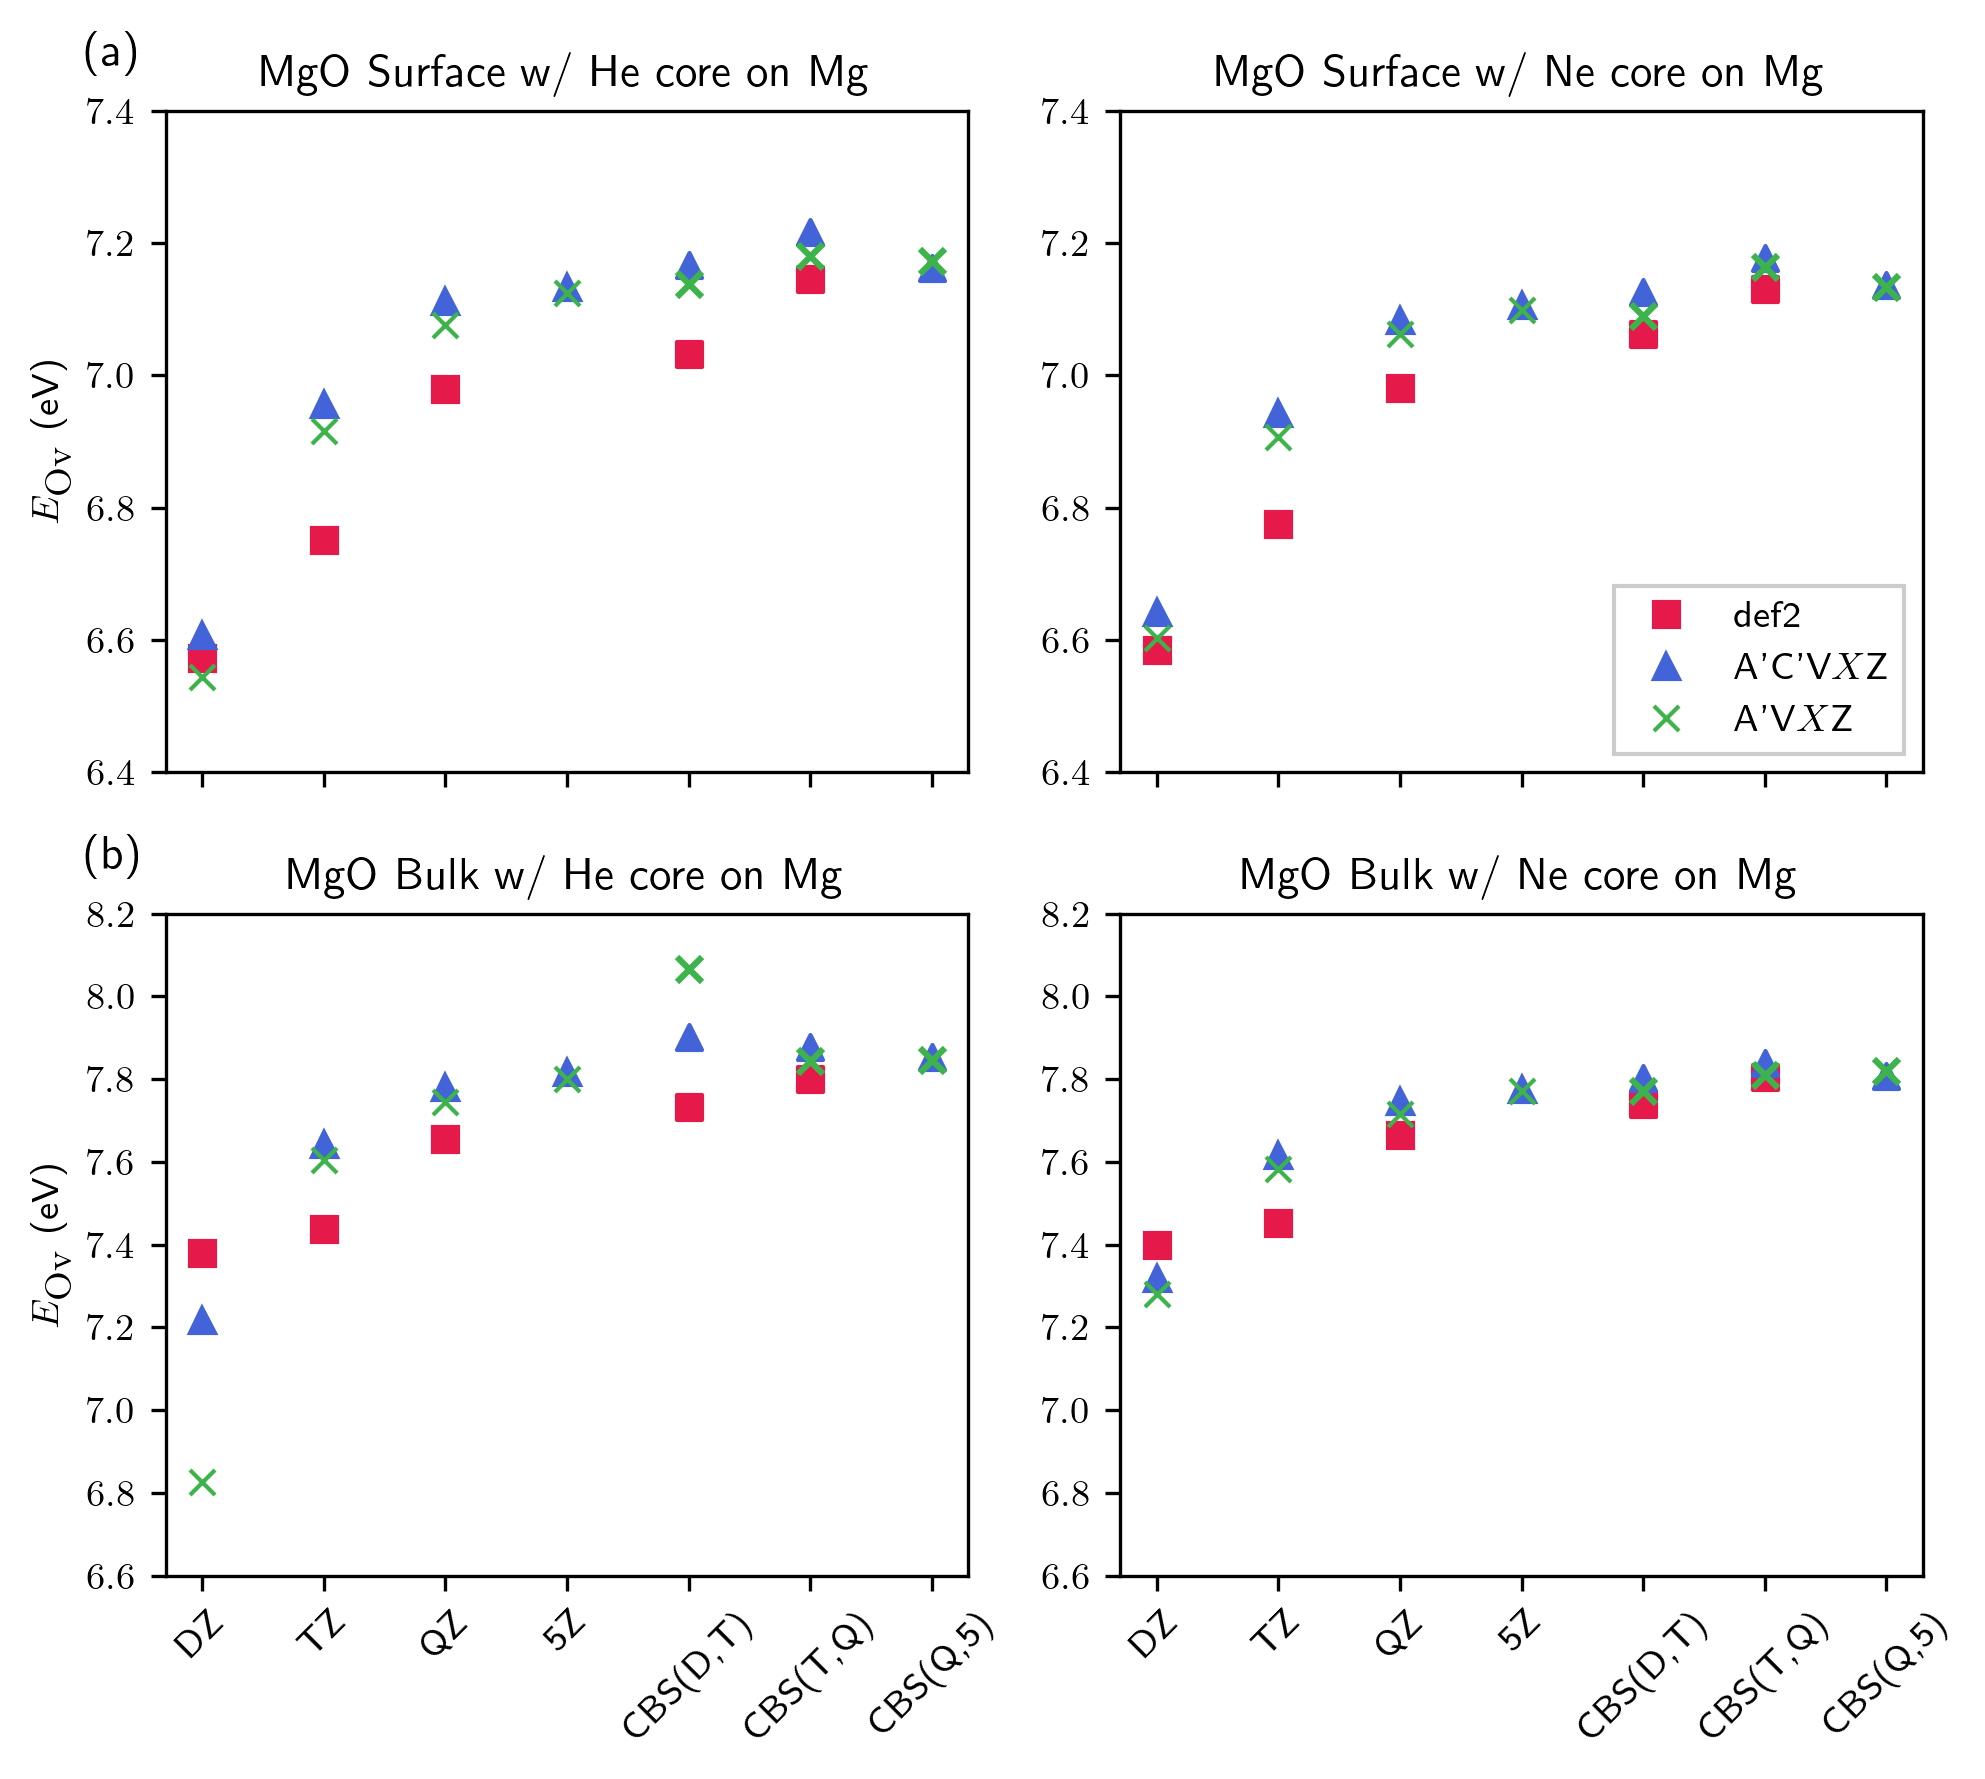

In [19]:
thresholds = ['Tight']
core_sizes = ['He','Ne']
data_basis = np.empty((len(thresholds),len(core_sizes)),dtype=dict)
data_cbs = np.empty((len(thresholds),len(core_sizes)),dtype=list)

for index1, i in enumerate(thresholds):
     for index2, j  in enumerate(core_sizes):
          energies_dict=get_energy('02-Simulation_Data/Fig_S01+Fig_S02-cWFT_Basis_Set_Convergence/Calculations/MgO_Surface/{0}/{1}core'.format(i,j),system='MgO')
          a,b = get_energy_extrapolation(energies_dict,system='MgO',output=False)
          data_basis[index1,index2] = energies_dict
          data_cbs[index1,index2] = [x - O2_bind_ene['LNO-CCSD(T)']/2 for x in a]


fig, axs = plt.subplots(2,2,figsize=(6.69,6),dpi=300, sharex=True, tight_layout=True)

for index, l in enumerate(core_sizes):


     basis_list = ['SVP','TZVPP','QZVPP']
     elec_settings = (0,index)

     axs[0,index].plot([2,3,4], [data_basis[elec_settings][x]['vac_energy']['total_lccsdt'] - O2_bind_ene['LNO-CCSD(T)']/2 for x in basis_list],'s',color=color_dict['red'], label='def2')
     axs[0,index].scatter([6,7], data_cbs[elec_settings][:2],marker='s',color=color_dict['red']) #,label='def2')

     basis_list = ['CVDZ','CVTZ','CVQZ','CV5Z']


     axs[0,index].plot([2,3,4,5], [data_basis[elec_settings][x]['vac_energy']['total_lccsdt'] - O2_bind_ene['LNO-CCSD(T)']/2 for x in basis_list],'^',color=color_dict['blue'],label='A\'C\'V$X$Z')
     axs[0,index].scatter([6,7,8], data_cbs[elec_settings][5:],marker='^',color=color_dict['blue']) #,label='A\'C\'VxZ')

     basis_list = ['VDZ','VTZ','VQZ','V5Z']

     axs[0,index].plot([2,3,4,5], [data_basis[elec_settings][x]['vac_energy']['total_lccsdt'] - O2_bind_ene['LNO-CCSD(T)']/2 for x in basis_list],'x',color=color_dict['green'], label='A\'V$X$Z')
     axs[0,index].scatter([6,7,8], data_cbs[elec_settings][2:5],marker='x',color=color_dict['green'])


     axs[0,index].set_xticks([2,3,4,5,6,7,8])
     axs[0,index].set_ylim([6.4,7.4])

     axs[0,index].set_title('MgO Surface w/ {1} core on Mg'.format(thresholds[elec_settings[0]],core_sizes[index]))

axs[0,0].text(-0.1,1.07,'(a)', transform=axs[0,0].transAxes,fontsize=11)

axs[0,0].set_ylabel(r'$E_\textrm{Ov}$ (eV)')

axs[0,1].legend(fancybox=False,framealpha=1,loc='lower right')

thresholds = ['Tight'] 
core_sizes = ['He','Ne']
data_basis = np.empty((len(thresholds),len(core_sizes)),dtype=dict)
data_cbs = np.empty((len(thresholds),len(core_sizes)),dtype=list)

for index1, i in enumerate(thresholds):
     for index2, j  in enumerate(core_sizes):
          energies_dict=get_energy('02-Simulation_Data/Fig_S01+Fig_S02-cWFT_Basis_Set_Convergence/Calculations/MgO_Bulk/{0}/{1}core'.format(i,j),system='MgO')
          a,b = get_energy_extrapolation(energies_dict,system='MgO',output=False)
          # print(a)

          data_basis[index1,index2] = energies_dict
          data_cbs[index1,index2] = [x - O2_bind_ene['LNO-CCSD(T)']/2 for x in a]

for index, l in enumerate(core_sizes):


     basis_list = ['SVP','TZVPP','QZVPP']
     elec_settings = (0,index)

     axs[1,index].plot([2,3,4], [data_basis[elec_settings][x]['vac_energy']['total_lccsdt'] - O2_bind_ene['LNO-CCSD(T)']/2 for x in basis_list],'s',color=color_dict['red'], label='def2')
     axs[1,index].scatter([6,7], data_cbs[elec_settings][:2],marker='s',color=color_dict['red'])

     basis_list = ['CVDZ','CVTZ','CVQZ','CV5Z']


     axs[1,index].plot([2,3,4,5], [data_basis[elec_settings][x]['vac_energy']['total_lccsdt'] - O2_bind_ene['LNO-CCSD(T)']/2 for x in basis_list],'^',color=color_dict['blue'],label='A\'C\'V$X$Z')
     axs[1,index].scatter([6,7,8], data_cbs[elec_settings][5:],marker='^',color=color_dict['blue'])

     basis_list = ['VDZ','VTZ','VQZ','V5Z']

     axs[1,index].plot([2,3,4,5], [data_basis[elec_settings][x]['vac_energy']['total_lccsdt'] - O2_bind_ene['LNO-CCSD(T)']/2 for x in basis_list],'x',color=color_dict['green'], label='A\'V$X$Z')
     axs[1,index].scatter([6,7,8], data_cbs[elec_settings][2:5],marker='x',color=color_dict['green'])


     axs[1,index].set_xticks([2,3,4,5,6,7,8])
     axs[1,index].set_xticklabels(['DZ','TZ','QZ','5Z','CBS(D,T)','CBS(T,Q)','CBS(Q,5)'],rotation=45)
     axs[1,index].set_ylim([6.6,8.2])

     axs[1,index].set_title('MgO Bulk w/ {1} core on Mg'.format(thresholds[elec_settings[0]],core_sizes[index]))


axs[1,0].text(-0.1,1.07,'(b)', transform=axs[1,0].transAxes,fontsize=11)
axs[1,0].set_ylabel(r'$E_\textrm{Ov}$ (eV)')

plt.savefig('03-Figures/Fig_S1.jpg')

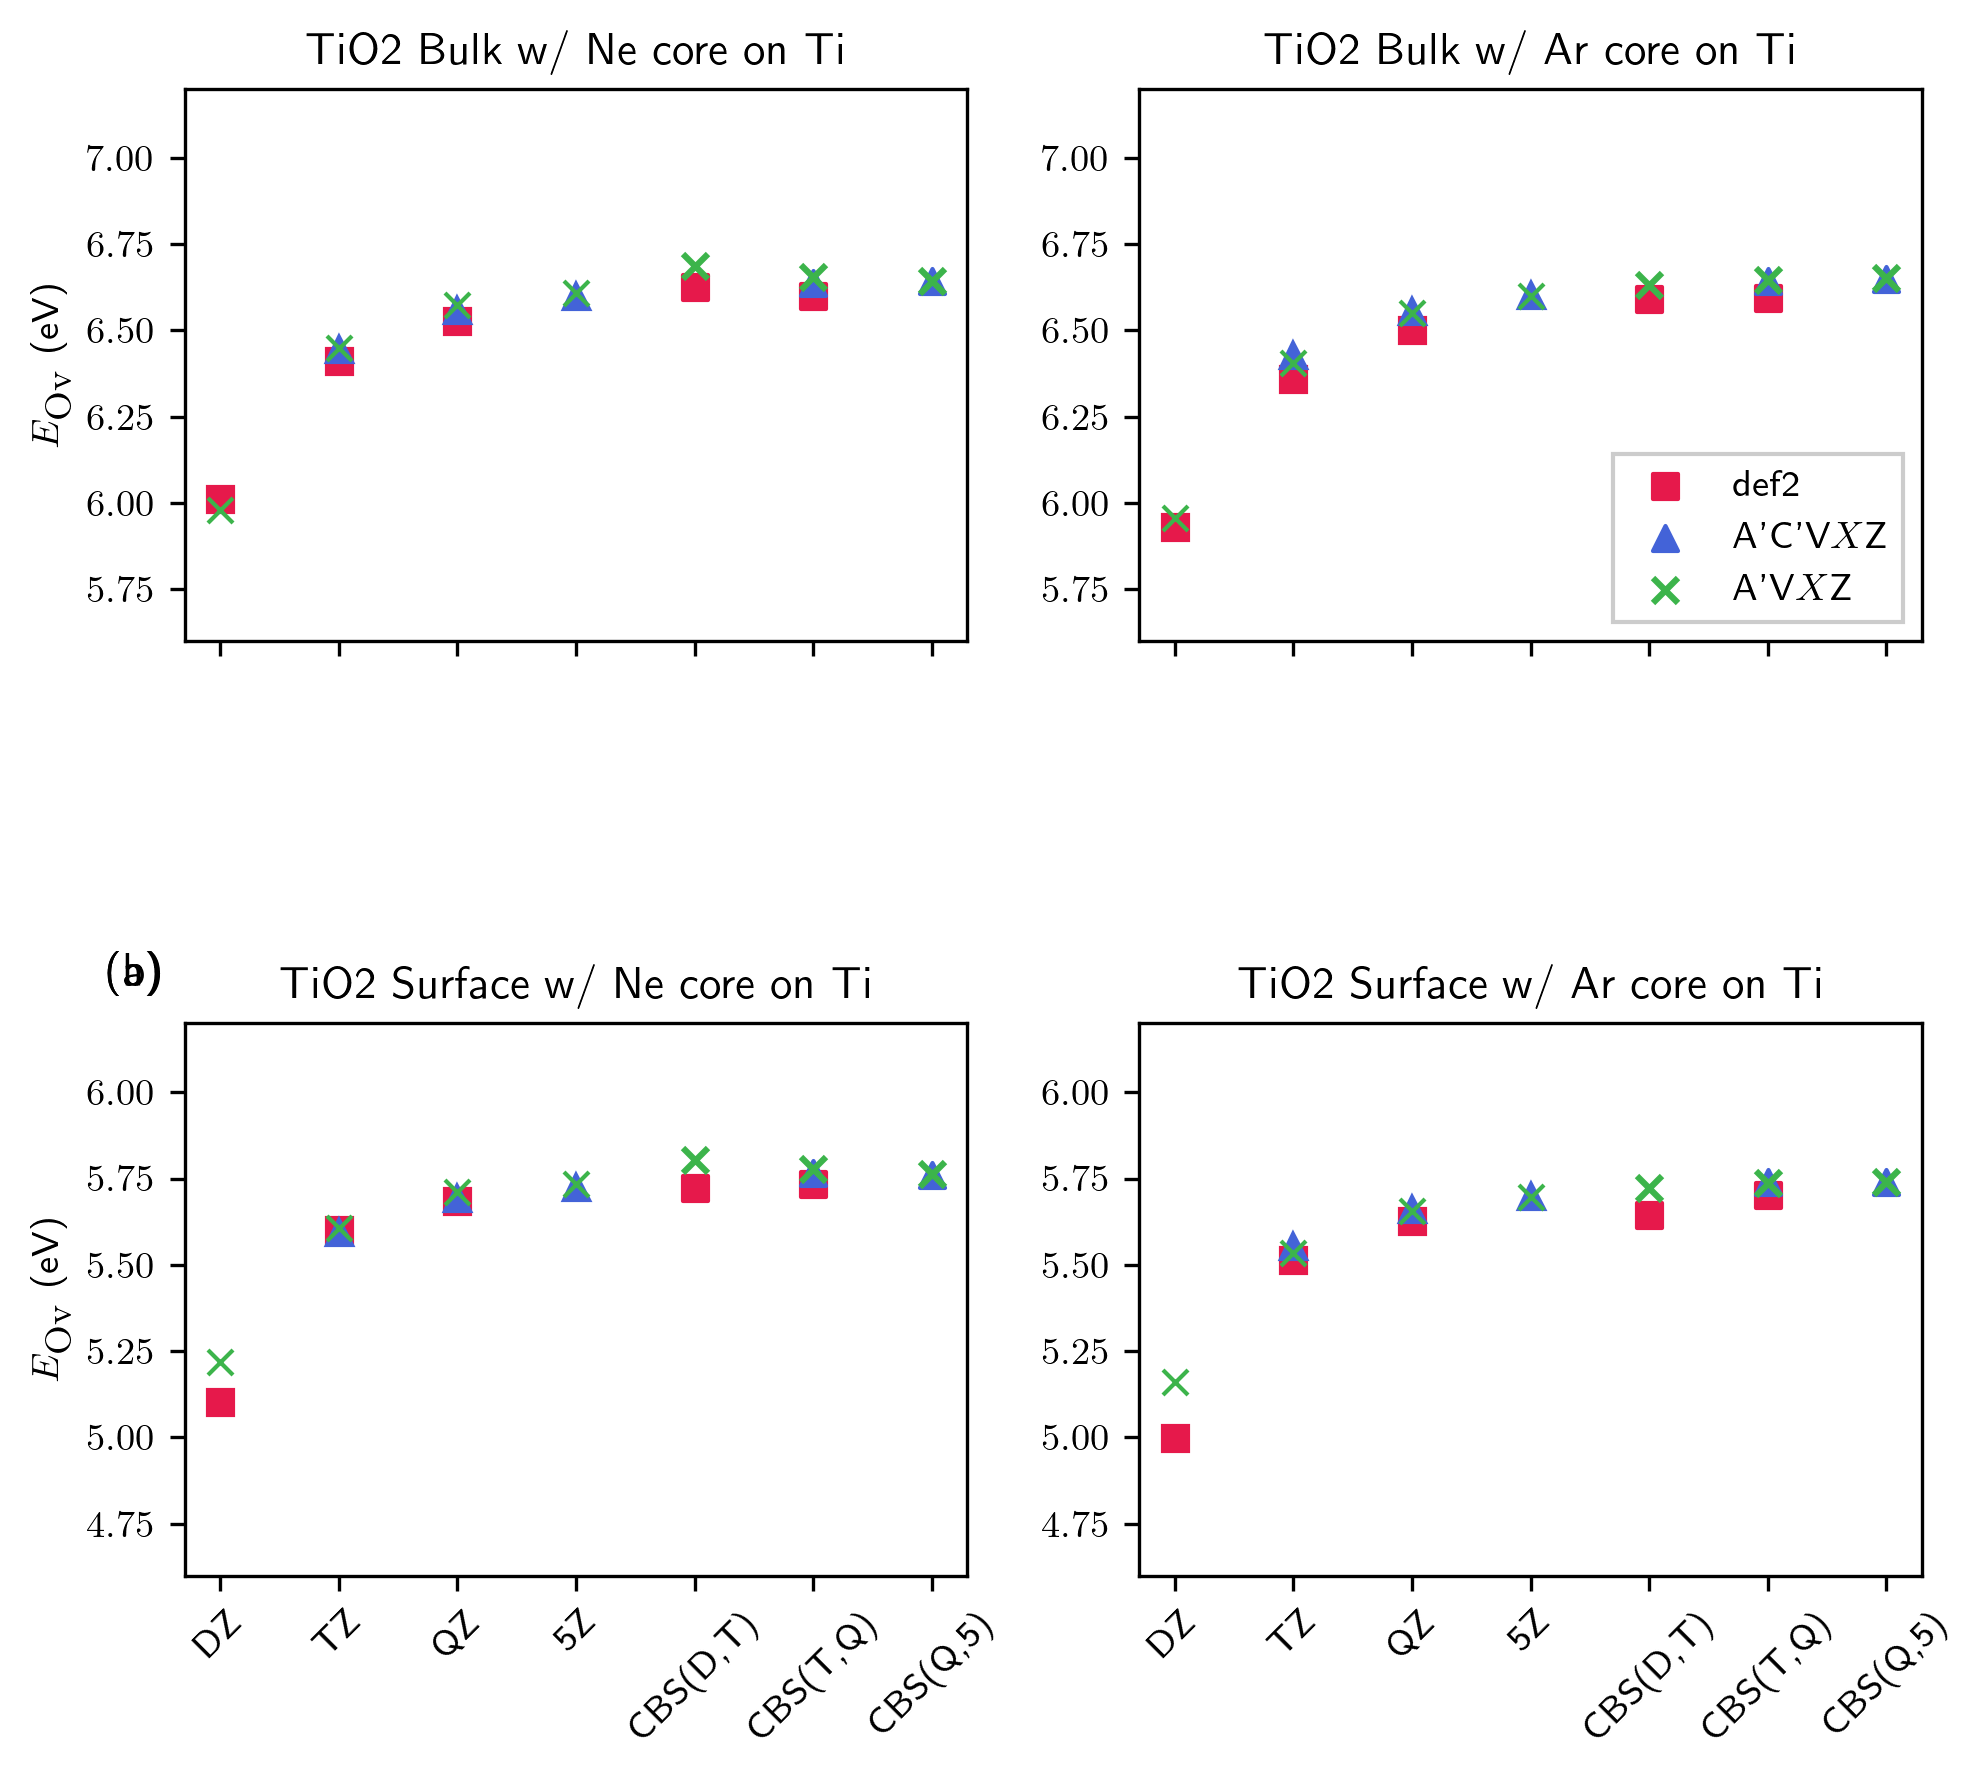

In [20]:
fig, axs = plt.subplots(2,2,figsize=(6.69,6),dpi=300, sharex=True, tight_layout=True)

thresholds = ['Tight'] 
core_sizes = ['Ne','Ar']
data_basis = np.empty((len(thresholds),len(core_sizes)),dtype=dict)
data_cbs = np.empty((len(thresholds),len(core_sizes)),dtype=list)

for index1, i in enumerate(thresholds):
     for index2, j  in enumerate(core_sizes):
          energies_dict=get_energy('02-Simulation_Data/Fig_S01+Fig_S02-cWFT_Basis_Set_Convergence/Calculations/TiO2_Bulk/{0}/{1}core'.format(i,j),system='MgO',basis_list = ['SVP','TZVPP', 'QZVPP', 'CVTZ','CVQZ','CV5Z','VDZ','VTZ','VQZ','V5Z'])
          a,b = get_energy_extrapolation(energies_dict,system='TiO2',output=False)
          data_basis[index1,index2] = energies_dict
          data_cbs[index1,index2] = [x - O2_bind_ene['LNO-CCSD(T)']/2 for x in a]

# For the normal settings + He core, let's plot out the convergence behaviour of various basis sets

for index, l in enumerate(core_sizes):


     basis_list = ['SVP','TZVPP','QZVPP']
     elec_settings = (0,index)

     axs[0,index].plot([2,3,4], [data_basis[elec_settings][x]['vac_energy']['total_lccsdt'] - O2_bind_ene['LNO-CCSD(T)']/2 for x in basis_list],'s',color=color_dict['red'])
     axs[0,index].scatter([6,7], data_cbs[elec_settings][:2],marker='s',color=color_dict['red'],label='def2')

     basis_list = ['CVTZ','CVQZ','CV5Z']


     axs[0,index].plot([3,4,5], [data_basis[elec_settings][x]['vac_energy']['total_lccsdt'] - O2_bind_ene['LNO-CCSD(T)']/2 for x in basis_list],'^',color=color_dict['blue'])
     axs[0,index].scatter([7,8], data_cbs[elec_settings][5:],marker='^',color=color_dict['blue'],label='A\'C\'V$X$Z')

     basis_list = ['VDZ','VTZ','VQZ','V5Z']

     axs[0,index].plot([2,3,4,5], [data_basis[elec_settings][x]['vac_energy']['total_lccsdt'] - O2_bind_ene['LNO-CCSD(T)']/2 for x in basis_list],'x',color=color_dict['green'])
     axs[0,index].scatter([6,7,8], data_cbs[elec_settings][2:5],marker='x',color=color_dict['green'],label='A\'V$X$Z')


     axs[0,index].set_xticks([2,3,4,5,6,7,8])
     axs[0,index].set_xticklabels(['DZ','TZ','QZ','5Z','CBS(D,T)','CBS(T,Q)','CBS(Q,5)'],rotation=45)
     axs[0,index].set_ylim([5.6,7.2])

     axs[0,index].set_title('TiO2 Bulk w/ {1} core on Ti'.format(thresholds[elec_settings[0]],core_sizes[index]))


axs[0,0].text(-0.1,1.07,'(a)', transform=axs[1,0].transAxes,fontsize=11)
axs[0,0].set_ylabel(r'$E_\textrm{Ov}$ (eV)')


thresholds = ['Tight'] 
core_sizes = ['Ne','Ar']
data_basis = np.empty((len(thresholds),len(core_sizes)),dtype=dict)
data_cbs = np.empty((len(thresholds),len(core_sizes)),dtype=list)

for index1, i in enumerate(thresholds):
     for index2, j  in enumerate(core_sizes):
          energies_dict=get_energy('02-Simulation_Data/Fig_S01+Fig_S02-cWFT_Basis_Set_Convergence/Calculations/TiO2_Surface/{0}/{1}core'.format(i,j),system='MgO',basis_list = ['SVP','TZVPP', 'QZVPP', 'CVTZ','CVQZ','CV5Z','VDZ','VTZ','VQZ','V5Z'])
          a,b = get_energy_extrapolation(energies_dict,system='TiO2',output=False)
          data_basis[index1,index2] = energies_dict
          data_cbs[index1,index2] = [x - O2_bind_ene['LNO-CCSD(T)']/2 for x in a]


for index, l in enumerate(core_sizes):


     basis_list = ['SVP','TZVPP','QZVPP']
     elec_settings = (0,index)

     axs[1,index].plot([2,3,4], [data_basis[elec_settings][x]['vac_energy']['total_lccsdt'] - O2_bind_ene['LNO-CCSD(T)']/2 for x in basis_list],'s',color=color_dict['red'], label='def2')
     axs[1,index].scatter([6,7], data_cbs[elec_settings][:2],marker='s',color=color_dict['red']) #,label='def2')

     basis_list = ['CVTZ','CVQZ','CV5Z']


     axs[1,index].plot([3,4,5], [data_basis[elec_settings][x]['vac_energy']['total_lccsdt'] - O2_bind_ene['LNO-CCSD(T)']/2 for x in basis_list],'^',color=color_dict['blue'],label='A\'C\'V$X$Z')
     axs[1,index].scatter([7,8], data_cbs[elec_settings][5:],marker='^',color=color_dict['blue']) #,label='A\'C\'VxZ')

     basis_list = ['VDZ','VTZ','VQZ','V5Z']

     axs[1,index].plot([2,3,4,5], [data_basis[elec_settings][x]['vac_energy']['total_lccsdt'] - O2_bind_ene['LNO-CCSD(T)']/2 for x in basis_list],'x',color=color_dict['green'], label='A\'V$X$Z')
     axs[1,index].scatter([6,7,8], data_cbs[elec_settings][2:5],marker='x',color=color_dict['green'])


     axs[1,index].set_xticks([2,3,4,5,6,7,8])
     axs[1,index].set_xticklabels(['DZ','TZ','QZ','5Z','CBS(D,T)','CBS(T,Q)','CBS(Q,5)'],rotation=45)
     axs[1,index].set_ylim([4.6,6.2])

     axs[1,index].set_title('TiO2 Surface w/ {1} core on Ti'.format(thresholds[elec_settings[0]],core_sizes[index]))


axs[1,0].text(-0.1,1.07,'(b)', transform=axs[1,0].transAxes,fontsize=11)
axs[1,0].set_ylabel(r'$E_\textrm{Ov}$ (eV)')
axs[0,1].legend(fancybox=False,framealpha=1,loc='lower right')


plt.savefig('03-Figures/Fig_S2.jpg')


### Table S6 - XC functional depdence of rutile TiO<sub>2</sub> and rocksalt MgO lattice parameters

In [28]:
# Structural files can be found in the folder: 02-Simulation_Data/Table_S06-XC_Functional_Dependence_Lattice_Parameter for analysis

### Figure S3 - Range of E<sub>Ov</sub> for different shapes for a given size of cluster

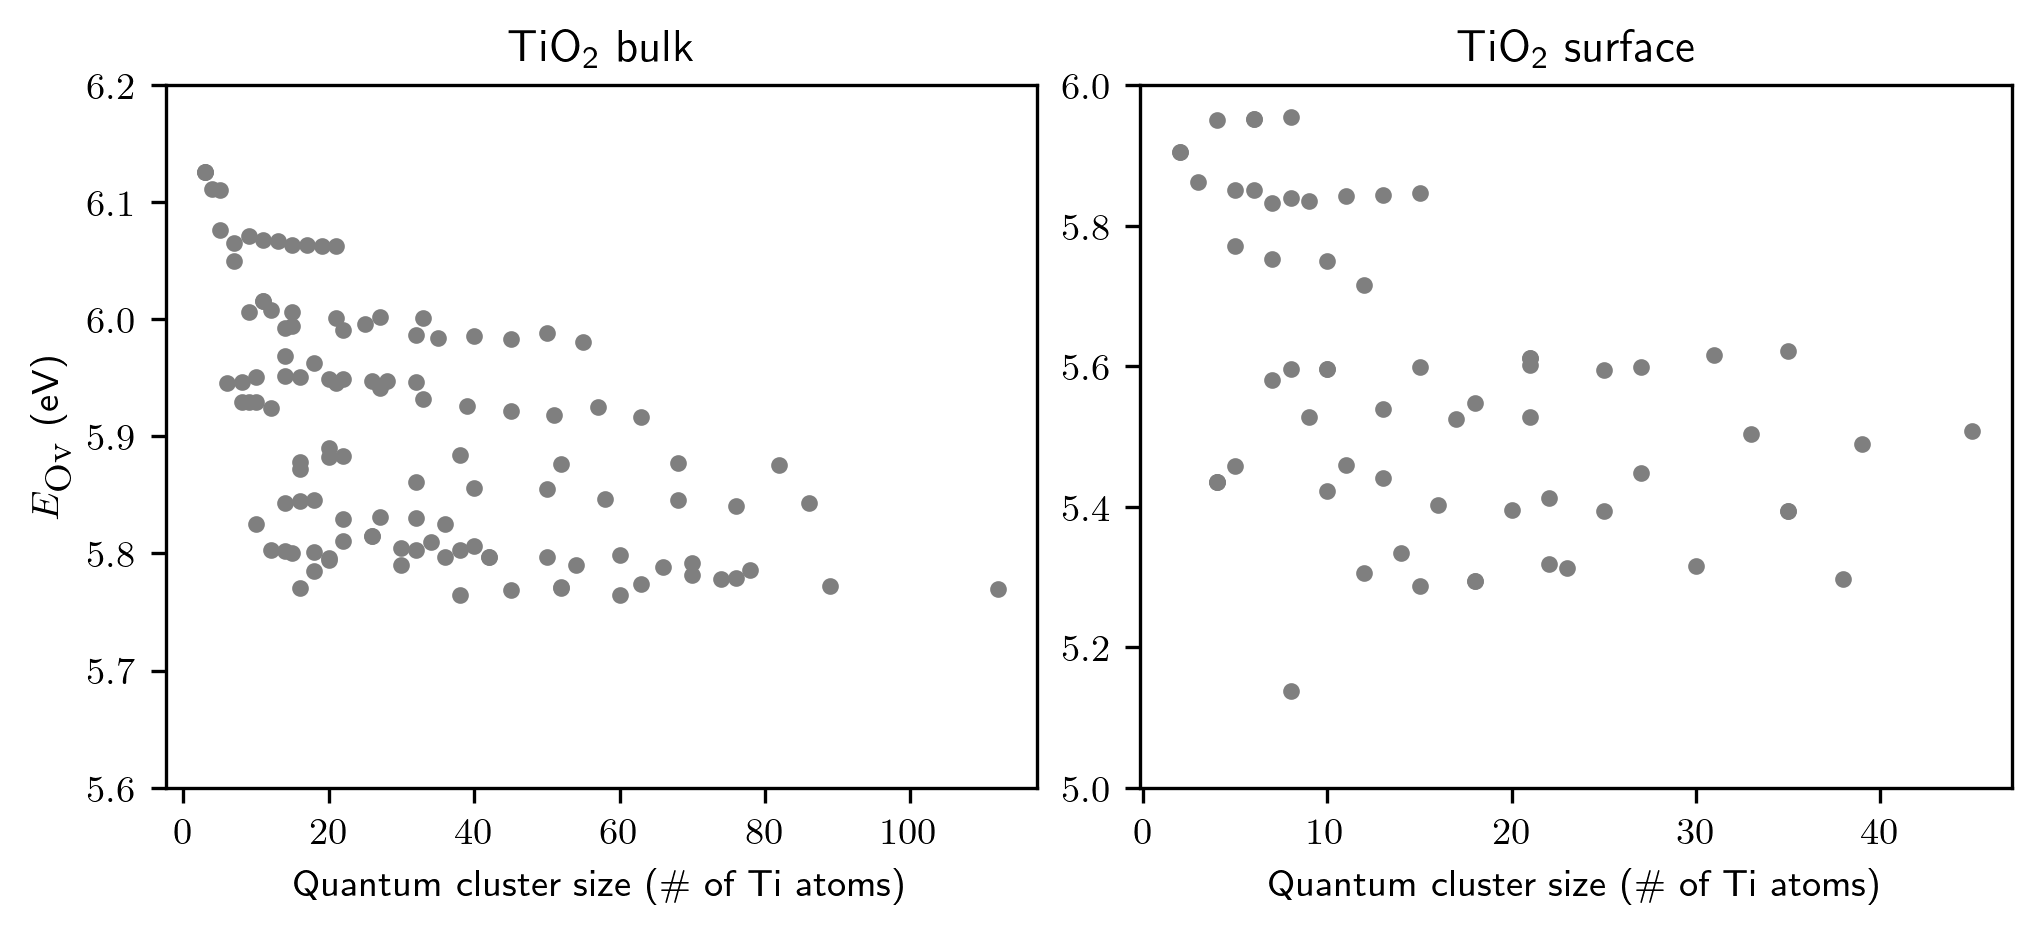

In [21]:
# For TiO2 bulk

PBE_bind_ene = O2_bind_ene['PBE']

fig, axs = plt.subplots(1,2,figsize=(6.69,3),dpi=300, constrained_layout=True)

sph_stoic = np.loadtxt('02-Simulation_Data/Fig_S03-EOv_Size_vs_Shape/Calculations/TiO2_bulk/energies_spherical_converge')[-11:]
sph_charge= np.loadtxt('02-Simulation_Data/Fig_S03-EOv_Size_vs_Shape/Calculations/TiO2_bulk/energies_spherical_converge')[:11]

sph_stoic_vac_form = (sph_stoic[:,-1] + O_ene_PBE_SVP - sph_stoic[:,-2])*Hartree - PBE_bind_ene/2
sph_charge_vac_form = (sph_charge[:,-1] + O_ene_PBE_SVP - sph_charge[:,-2])*Hartree - PBE_bind_ene/2

sph_charge_size = sph_stoic[:,4]


minimal_decrease = np.loadtxt('02-Simulation_Data/Fig_S03-EOv_Size_vs_Shape/Calculations/TiO2_bulk/energies_minimal_decrease')

minimal_decrease_vac_form = (minimal_decrease[:,-1] + O_ene_PBE_SVP - minimal_decrease[:,-2])*Hartree  - PBE_bind_ene/2
minimal_decrease_size = minimal_decrease[:,4]

with open('02-Simulation_Data/Fig_S03-EOv_Size_vs_Shape/Calculations/TiO2_bulk/all_energies') as f:
    mylist = f.read().splitlines() 

sizelist = []
vac_energies_list = []
existing_list = []


for i in range(len(mylist)):
    if len(mylist[i].split()) == 7:
        if mylist[i].split()[:3] not in existing_list:
            existing_list += [mylist[i].split()[:3]]
            energy = (float(mylist[i].split()[-1]) + O_ene_PBE_SVP - float(mylist[i].split()[-2]))*Hartree  - PBE_bind_ene/2
            sizelist += [mylist[i].split()[3:5]]
            vac_energies_list += [energy]

sizelist = np.array(sizelist,dtype=int)


axs[0].scatter( sizelist[:,0], np.array(vac_energies_list) , color='tab:gray',marker='.',label='cuboidal xyz')

clus_size = [3,11,18,26,34,40,50,60,70,76,89]

axs[0].scatter( sph_charge_size, sph_stoic_vac_form  , color='tab:gray', marker='.',label='Stoichiometric convergence')
axs[0].scatter( minimal_decrease_size,minimal_decrease_vac_form,color='tab:gray', marker='.')

# For TiO2 surface

minimal_decrease = np.loadtxt('02-Simulation_Data/Fig_S03-EOv_Size_vs_Shape/Calculations/TiO2_surface/energies_minimal_decrease')
minimal_decrease_vac_form = (minimal_decrease[:,-1] + O_ene_PBE_SVP - minimal_decrease[:,-2])*Hartree - PBE_bind_ene/2
minimal_decrease_size = minimal_decrease[:,4]

with open('02-Simulation_Data/Fig_S03-EOv_Size_vs_Shape/Calculations/TiO2_surface/all_energies') as f:
    mylist = f.read().splitlines() 

sizelist = []
vac_energies_list = []
existing_list = []


for i in range(len(mylist)):
    if len(mylist[i].split()) == 7:
        if mylist[i].split()[:3] not in existing_list:
            existing_list += [mylist[i].split()[:3]]
            energy = (float(mylist[i].split()[-1]) + O_ene_PBE_SVP - float(mylist[i].split()[-2]))*Hartree - PBE_bind_ene/2
            sizelist += [mylist[i].split()[3:5]]
            vac_energies_list += [energy]

sizelist = np.array(sizelist,dtype=int)


axs[1].scatter( sizelist[:,0], np.array(vac_energies_list),color='tab:gray',marker='.',label='cuboidal xyz')
axs[1].scatter( minimal_decrease_size,minimal_decrease_vac_form,color='tab:gray',marker='.',label='minimal decrease')


axs[0].set_ylabel(r'$E_\textrm{Ov}$ (eV)')
axs[0].set_xlabel(r'Quantum cluster size (\# of Ti atoms)')
axs[0].set_title(r'TiO\textsubscript{2} bulk')
axs[1].set_title(r'TiO\textsubscript{2} surface')

axs[1].set_xlabel(r'Quantum cluster size (\# of Ti atoms)')
axs[0].set_ylim([5.6,6.2])

axs[1].set_ylim([5.0,6.0])

plt.savefig('03-Figures/Fig_S3.jpg')


### Figure S5 - Finding the bulk TiO<sub>2</sub> smallest converged cluster 

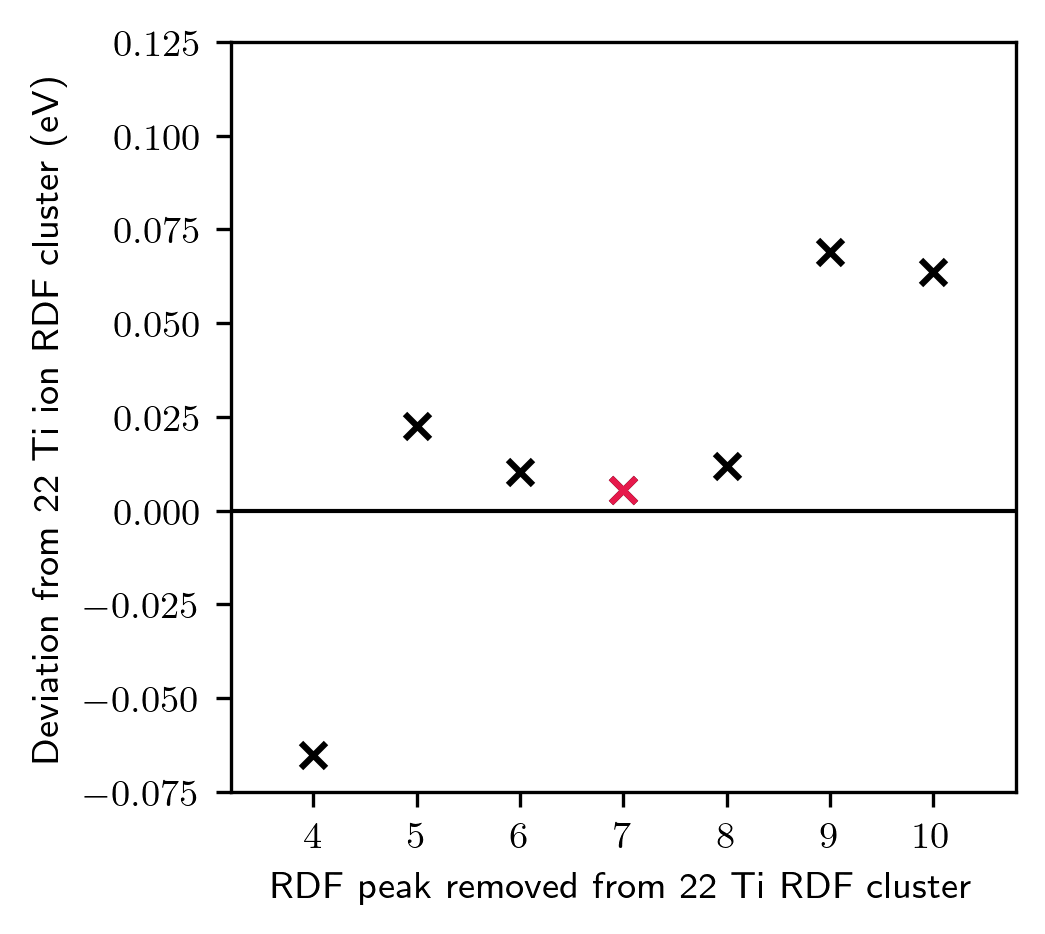

In [22]:
fig, axs = plt.subplots(figsize=(3.37,3),dpi=300, sharex = True, constrained_layout=True)
vac_energies_permutations = (np.loadtxt('02-Simulation_Data/Fig_S05-TiO2_Bulk_SCC/Calculations/energies_TZVPP')[:,2] + \
    O_ene_PBE_TZVPP - np.loadtxt('02-Simulation_Data/Fig_S05-TiO2_Bulk_SCC/Calculations/energies_TZVPP')[:,1])*Hartree - O2_bind_ene['PBE']/2
vac_energies_permutations = np.append(vac_energies_permutations,RDF_eov[8]) # Add the EOv value from removing the tenth shell taken from Fig 02
vac_energies_permutations_error = vac_energies_permutations - RDF_TiO2_bulk_eov[9]
permutations = [4,5,6,7,8,9,10]

axs.plot([0, 20], [0.0,0.0],'k-',linewidth=1)

axs.scatter(permutations,vac_energies_permutations_error,color=color_dict['black'],marker='x')
axs.scatter(permutations[-4],vac_energies_permutations_error[-4],color=color_dict['red'],marker='x')


axs.set_ylabel(r'Deviation from 22 Ti ion RDF cluster (eV)')
axs.set_xlabel(r'RDF peak removed from 22 Ti RDF cluster')
axs.set_xticks(permutations)
axs.set_ylim([-0.075, 0.125])
axs.set_xlim([3.2,10.8])

plt.savefig('03-Figures/Fig_S5.jpg')

### Table S9 and S10 - E<sub>Ov</sub> size convergence at LMP2 level for MgO bulk and surface

In [23]:
# For MgO bulk
LMP2_eov_size_MgO_Bulk = (np.loadtxt('02-Simulation_Data/Table_S09+S10-cWFT_Size_Convergence_MgO/Calculations/MgO_Bulk/energies_defect_TZVPP')[:,1] + \
    O_ene_LMP2_TZVPP - np.loadtxt('02-Simulation_Data/Table_S09+S10-cWFT_Size_Convergence_MgO/Calculations/MgO_Bulk/energies_perfect_TZVPP')[:,1])*Hartree - O2_bind_ene['LMP2']/2
LMP2_eov_size_MgO_Bulk_error = LMP2_eov_size_MgO_Bulk - LMP2_eov_size_MgO_Bulk[-1]
LMP2_eov_size_MgO_Bulk_sizes = [6, 14, 38,68]

LMP2_eov_size_MgO_Bulk_dict = {}
for i in range(len(LMP2_eov_size_MgO_Bulk_sizes)):
    LMP2_eov_size_MgO_Bulk_dict['{0}'.format(LMP2_eov_size_MgO_Bulk_sizes[i])] = { 'LMP2 EOv (eV)': LMP2_eov_size_MgO_Bulk[i], 'Error (eV)': LMP2_eov_size_MgO_Bulk_error[i]}

df7 = pd.DataFrame(LMP2_eov_size_MgO_Bulk_dict)
df7 = df7.round(decimals=2)
df7.index.name = 'Size'
df7 = df7.transpose()
print(df7)


Size  LMP2 EOv (eV)  Error (eV)
6              7.68        0.38
14             7.48        0.17
38             7.33        0.02
68             7.31        0.00


In [24]:
# For MgO surface
LMP2_eov_size_MgO_Surface = (np.loadtxt('02-Simulation_Data/Table_S09+S10-cWFT_Size_Convergence_MgO/Calculations/MgO_Surface/energies_defect_TZVPP')[:,2] + \
    O_ene_LMP2_TZVPP - np.loadtxt('02-Simulation_Data/Table_S09+S10-cWFT_Size_Convergence_MgO/Calculations/MgO_Surface/energies_perfect_TZVPP')[:,2])*Hartree - O2_bind_ene['LMP2']/2
LMP2_eov_size_MgO_Surface_error = LMP2_eov_size_MgO_Surface - LMP2_eov_size_MgO_Surface[-1]
LCCSDT_eov_size_MgO_Surface = (np.loadtxt('02-Simulation_Data/Table_S09+S10-cWFT_Size_Convergence_MgO/Calculations/MgO_Surface/energies_defect_TZVPP')[:,1] + \
    O_ene_CCSDT_TZVPP - np.loadtxt('02-Simulation_Data/Table_S09+S10-cWFT_Size_Convergence_MgO/Calculations/MgO_Surface/energies_perfect_TZVPP')[:,1])*Hartree - O2_bind_ene['LMP2']/2
LCCSDT_eov_size_MgO_Surface_error = LCCSDT_eov_size_MgO_Surface - LCCSDT_eov_size_MgO_Surface[-1]


LMP2_eov_size_MgO_Surface_sizes = [4,5,9,17,21,25,29,33,41,42]

LMP2_eov_size_MgO_Surface_dict = {}
for i in range(len(LMP2_eov_size_MgO_Surface_sizes)):
    LMP2_eov_size_MgO_Surface_dict['{0}'.format(LMP2_eov_size_MgO_Surface_sizes[i])] = { 'LMP2 EOv (eV)': LMP2_eov_size_MgO_Surface[i], 'LMP2 Error (eV)': LMP2_eov_size_MgO_Surface_error[i],'LNO-CCSD(T) EOv (eV)': LCCSDT_eov_size_MgO_Surface[i], 'LNO-CCSD(T) Error (eV)': LCCSDT_eov_size_MgO_Surface_error[i]}

df8 = pd.DataFrame(LMP2_eov_size_MgO_Surface_dict)
df8 = df8.round(decimals=2)
df8.index.name = 'Size'
df8 = df8.transpose()
print(df8)

Size  LMP2 EOv (eV)  LMP2 Error (eV)  LNO-CCSD(T) EOv (eV)  \
4              7.14             0.25                  6.59   
5              7.05             0.17                  6.51   
9              6.98             0.09                  6.43   
17             6.93             0.05                  6.38   
21             6.88            -0.01                  6.31   
25             6.85            -0.04                  6.28   
29             6.84            -0.04                  6.28   
33             6.87            -0.01                  6.32   
41             6.88            -0.01                  6.33   
42             6.88             0.00                  6.34   

Size  LNO-CCSD(T) Error (eV)  
4                       0.26  
5                       0.18  
9                       0.10  
17                      0.04  
21                     -0.03  
25                     -0.05  
29                     -0.06  
33                     -0.02  
41                     -0.01  
42     

### Fig S6 - E<sub>Ov</sub> size convergence at LMP2 level for TiO<sub>2</sub> surface

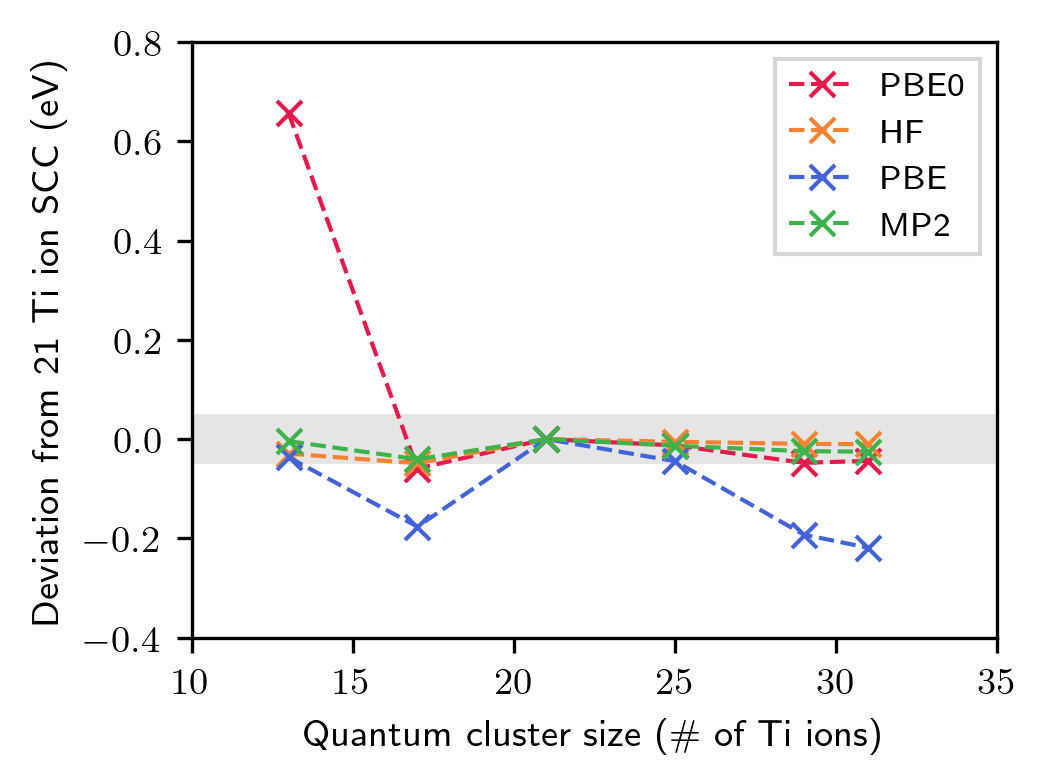

In [25]:
cluster_sizes = [13,17,21,25,29,31]
vac_energies_PBE = (np.loadtxt('02-Simulation_Data/Fig_S06-cWFT_Size_Convergence_TiO2_Surface/Calculations/PBE/energies_defect_TZVPP')[:,1] + O_ene_PBE_TZVPP - \
    np.loadtxt('02-Simulation_Data/Fig_S06-cWFT_Size_Convergence_TiO2_Surface/Calculations/PBE/energies_perfect_TZVPP')[:,1])*Hartree - O2_bind_ene['PBE']/2
vac_energies_PBE0 = (np.loadtxt('02-Simulation_Data/Fig_S06-cWFT_Size_Convergence_TiO2_Surface/Calculations/PBE0/energies_TZVPP')[:,2] + O_ene_PBE0_TZVPP - \
    np.loadtxt('02-Simulation_Data/Fig_S06-cWFT_Size_Convergence_TiO2_Surface/Calculations/PBE0/energies_TZVPP')[:,1])*Hartree - O2_bind_ene['PBE0']/2
vac_energies_MP2 = (np.loadtxt('02-Simulation_Data/Fig_S06-cWFT_Size_Convergence_TiO2_Surface/Calculations/MP2/energies_MP2_defect')[:] + O_ene_LMP2_TZVPP - \
    np.loadtxt('02-Simulation_Data/Fig_S06-cWFT_Size_Convergence_TiO2_Surface/Calculations/MP2/energies_MP2_perfect')[:])*Hartree - O2_bind_ene['LMP2']/2
vac_energies_HF = (np.loadtxt('02-Simulation_Data/Fig_S06-cWFT_Size_Convergence_TiO2_Surface/Calculations/MP2/energies_HF_defect')[:] + O_ene_HF_TZVPP - \
    np.loadtxt('02-Simulation_Data/Fig_S06-cWFT_Size_Convergence_TiO2_Surface/Calculations/MP2/energies_HF_perfect')[:])*Hartree - O2_bind_ene['LMP2']/2

fig, axs = plt.subplots(figsize=(3.37,2.5),dpi=300, sharex='col', constrained_layout=True)

axs.plot(cluster_sizes,vac_energies_PBE0- vac_energies_PBE0[2], 'x--',color=color_dict['red'],label='PBE0',linewidth=1)
axs.set_xlabel(r'Quantum cluster size (\# of Ti ions)')
axs.set_ylabel(r'Deviation from 21 Ti ion SCC (eV)')

axs.plot(cluster_sizes,vac_energies_HF- vac_energies_HF[2], 'x--',color=color_dict['orange'],label='HF',linewidth=1)
axs.plot(cluster_sizes,vac_energies_PBE- vac_energies_PBE[2], 'x--',color=color_dict['blue'],label='PBE',linewidth=1)
axs.plot(cluster_sizes,vac_energies_MP2 - vac_energies_MP2[2], 'x--',color=color_dict['green'],label='MP2',linewidth=1)

axs.fill_between([-10,150],[+0.05, +0.05],[-0.05, -0.05],color='tab:gray',edgecolor=None,alpha=0.2)
axs.legend(fontsize=8,frameon=True,fancybox=False,loc='upper right')
axs.set_xlim([10,35])
axs.set_ylim([-0.4,0.8])

plt.savefig('03-Figures/Fig_S6.jpg')

### Fig S7 - Odd-even Oscillations for E<sub>Ov</sub> in TiO<sub>2</sub> surface

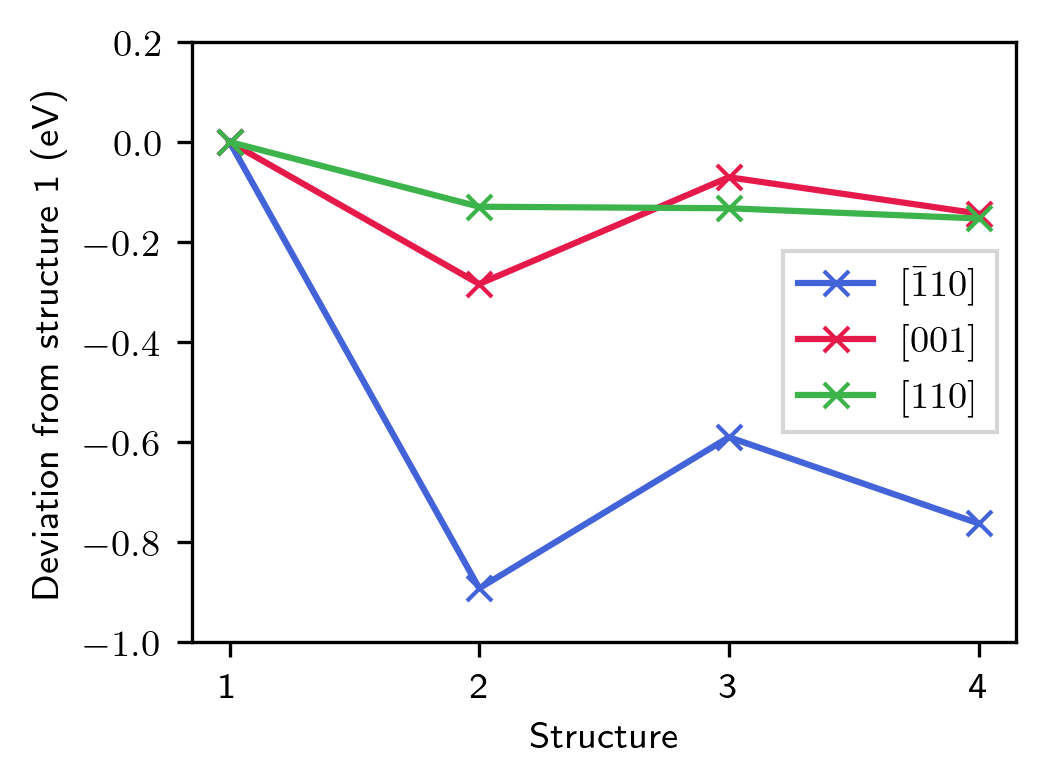

In [26]:
fig, axs = plt.subplots(figsize=(3.37,2.5),sharey=True,dpi=300,  constrained_layout=True)

# x, y and z gives the [-110], [001] and [110] direction respectively

x_eov_size = (np.loadtxt('02-Simulation_Data/Fig_S07-Odd_Even_Oscillations_TiO2_Surface/Calculations/x/energies_SVP')[:,6] + O_ene_PBE_SVP -\
     np.loadtxt('02-Simulation_Data/Fig_S07-Odd_Even_Oscillations_TiO2_Surface/Calculations/x/energies_SVP')[:,5])*Hartree - O2_bind_ene['PBE']/2
y_eov_size = (np.loadtxt('02-Simulation_Data/Fig_S07-Odd_Even_Oscillations_TiO2_Surface/Calculations/y/energies_SVP')[:,6] + O_ene_PBE_SVP -\
     np.loadtxt('02-Simulation_Data/Fig_S07-Odd_Even_Oscillations_TiO2_Surface/Calculations/y/energies_SVP')[:,5])*Hartree - O2_bind_ene['PBE']/2
z_eov_size = (np.loadtxt('02-Simulation_Data/Fig_S07-Odd_Even_Oscillations_TiO2_Surface/Calculations/z/energies_SVP')[:,6] + O_ene_PBE_SVP -\
     np.loadtxt('02-Simulation_Data/Fig_S07-Odd_Even_Oscillations_TiO2_Surface/Calculations/z/energies_SVP')[:,5])*Hartree - O2_bind_ene['PBE']/2

axs.plot(np.array([2,3,4,5]) -1,x_eov_size - x_eov_size[0], 'x-',label=r'$[\bar{1}10]$')
axs.plot(np.array([2,3,4,5]) -1 ,y_eov_size - y_eov_size[0], 'x-',label=r'$[001]$')
axs.plot(np.array([2,3,4,5])-1,z_eov_size - z_eov_size[0], 'x-',label=r'$[110]$')

axs.legend(fancybox=False)
axs.set_ylabel(r'Deviation from structure 1 (eV)')
axs.set_xlabel(r'Structure')
axs.set_xticks([1,2,3,4])
axs.set_xticklabels(['1','2','3','4'])
axs.set_ylim([-1.0,0.2])


plt.savefig('03-Figures/Fig_S7.jpg')


### Table S11 - LNO threshold convergence in MgO surface

In [27]:
basis_sets = ['VDZ','VTZ','CBS']
lno_settings = ['Loose','Normal','Tight','Canonical']

dummy123 = get_energy("02-Simulation_Data/Table_S11-LNO_Threshold_Convergence/Calculations/Canonical",system='MgO',basis_list=['VDZ','VTZ'],code_format='mrcc_can')
a,b,cbs3 = extrapolate.get_cbs(dummy123['VDZ']['vac_energy']['hf'],dummy123['VDZ']['vac_energy']['ccsdt'],\
        dummy123['VTZ']['vac_energy']['hf'],dummy123['VTZ']['vac_energy']['ccsdt'],X=2,Y=3,family='mixcc',convert_Hartree=False,shift=0.0,output=False)

threshold_comp = {ver: {col: 0.0 for col in lno_settings} for ver in basis_sets}



for index1,value1 in enumerate(lno_settings):
    if value1 == 'Canonical':
        dummy123 = get_energy("02-Simulation_Data/Table_S11-LNO_Threshold_Convergence/Calculations/{0}".format(value1),system='MgO',basis_list=['VDZ','VTZ'],code_format='mrcc_can')
    else:
        dummy123 = get_energy("02-Simulation_Data/Table_S11-LNO_Threshold_Convergence/Calculations/{0}".format(value1),system='MgO',basis_list=['VDZ','VTZ'],code_format='mrcc')
    for j in basis_sets:
        if j == 'CBS':
            if value1 == 'Canonical':
                a,b,cbs3 = extrapolate.get_cbs(dummy123['VDZ']['vac_energy']['hf'],dummy123['VDZ']['vac_energy']['ccsdt'],\
        dummy123['VTZ']['vac_energy']['hf'],dummy123['VTZ']['vac_energy']['ccsdt'],X=2,Y=3,family='mixcc',convert_Hartree=False,shift=0.0,output=False)
                threshold_comp['CBS'][value1] = cbs3 - O2_bind_ene['LNO-CCSD(T)']/2
            else:
                a,b,cbs3 = extrapolate.get_cbs(dummy123['VDZ']['vac_energy']['hf'],dummy123['VDZ']['vac_energy']['lccsdt'],\
        dummy123['VTZ']['vac_energy']['hf'],dummy123['VTZ']['vac_energy']['lccsdt'],X=2,Y=3,family='mixcc',convert_Hartree=False,shift=0.0,output=False)
                threshold_comp['CBS'][value1] = cbs3 - O2_bind_ene['LNO-CCSD(T)']/2
        else:
            if value1 == 'Canonical':
                threshold_comp[j][value1] = dummy123[j]['vac_energy']['total'] - O2_bind_ene['LNO-CCSD(T)']/2
            else:
                threshold_comp[j][value1] = dummy123[j]['vac_energy']['total_lccsdt'] - O2_bind_ene['LNO-CCSD(T)']/2


df9 = pd.DataFrame(threshold_comp)
df9 = df9.round(decimals=2)
df9.index.name = 'Basis Set'
print(df9)

            VDZ   VTZ   CBS
Basis Set                  
Loose      6.57  6.78  6.91
Normal     6.59  6.89  7.07
Tight      6.60  6.91  7.09
Canonical  6.62  6.91  7.09


### Table S13 - Comparison against deltaCCSD(T) approach of Richter et al.

In [28]:
# Mg6 cluster PBE calculation

mg6_pbe = (find_energy('02-Simulation_Data/Table_S13-EOv_DeltaCCSDT/Calculations/Mg6O9_PBE/defect/mrcc.out',typ='dft') + O_ene_PBE_TZVPP - \
    find_energy('02-Simulation_Data/Table_S13-EOv_DeltaCCSDT/Calculations/Mg6O9_PBE/perfect/mrcc.out',typ='dft'))*Hartree - 5.22/2

# Mg14 cluster PBE calculation

mg14_pbe = (find_energy('02-Simulation_Data/Table_S13-EOv_DeltaCCSDT/Calculations/Mg14O19_PBE/defect/mrcc.out',typ='dft') + O_ene_PBE_TZVPP - \
    find_energy('02-Simulation_Data/Table_S13-EOv_DeltaCCSDT/Calculations/Mg14O19_PBE/perfect/mrcc.out',typ='dft'))*Hartree - 5.22/2

# Mg6 cluster LNO-CCSD(T) calculation
method='lccsdt'
data_smaller_cc = get_energy('02-Simulation_Data/Table_S13-EOv_DeltaCCSDT/Calculations/Mg6O9_CCSDT',basis_list=['TZ','QZ'])
data_smaller_cc_cbs = extrapolate.get_cbs(data_smaller_cc['TZ']['vac_energy']['hf'],data_smaller_cc['TZ']['vac_energy'][method],\
            data_smaller_cc['QZ']['vac_energy']['hf'],data_smaller_cc['QZ']['vac_energy'][method],X=3,Y=4,family='def2',convert_Hartree=False ,shift=-5.22/2,output=False)
mg6_ccsdt = data_smaller_cc_cbs[-1]

print('Mg6O9      PBE EOv :     {0:.2f}'.format(mg6_pbe))
print('Mg14O19    PBE EOv :     {0:.2f}'.format(mg14_pbe))
print('Mg14O19  CCSDT EOv :     {0:.2f}'.format(mg6_ccsdt))
print('deltaCCSD(T)   EOv :     {0:.2f}'.format(mg6_ccsdt- mg6_pbe + mg14_pbe))

Mg6O9      PBE EOv :     7.25
Mg14O19    PBE EOv :     7.14
Mg14O19  CCSDT EOv :     7.84
deltaCCSD(T)   EOv :     7.73
